In [1]:
# Import all libraries that may be useful for this project
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.figure import Figure
from matplotlib.ticker import MaxNLocator
import math
import statsmodels as sm
%matplotlib inline

In [ ]:
#load the the data forest inventory and nutrients

nutrient=pd.read_csv('04_data/2_processed/nutrient.csv', encoding='ISO-8859-1', delimiter=';')
tree_inventory=pd.read_csv('04_data/2_processed/tree_inventory.csv', encoding='ISO-8859-1', delimiter=';')
traits_agg=pd.read_excel('/home/drdc/Documents/repos/Portfolio/eco-analysis/processed/traits_agg_mass.xlsx')
nutrient.head()

,plotID,treeID,Species,N,C,CN,N_mass,C_mass,P,NP,CP,K,Mg,Ca,Na,Fe,Al,Mn,Si
0,KBPL1,1008,Neoboutonia Macrocalyx,4.15,50.18,12.09,41500,501800,2196.80,18.891114,228.423161,17685.58,4106.51,8703.87,213.01,75.94,40.75,61.13,407.50
1,KBPL1,1015,Neoboutonia Macrocalyx,3.90,47.73,12.24,39000,477300,3191.47,12.220074,149.554907,16294.75,2954.51,6360.60,147.60,818.29,316.26,142.96,498.60
2,KBPL1,1017,Neoboutonia Macrocalyx,3.61,47.84,13.25,36100,478400,2526.85,14.286562,189.326632,13736.11,3834.16,7767.30,61.63,719.02,420.21,253.99,588.29
3,KBPL1,1023,Allophylus Kivuensis,3.75,48.13,12.84,37500,481300,3455.39,10.852610,139.289632,10526.61,3033.72,5698.03,29.85,848.92,466.44,722.05,615.70
4,KBPL1,1024,Allophylus Kivuensis,4.52,46.49,10.28,45200,464900,3446.51,13.114716,134.890077,28754.37,3510.83,5899.93,37.83,1034.71,389.67,875.82,552.35


In [ ]:
tree_inventory.head()

,forest,plotID,treeID,genus,species,famil,meanWD,predHeight18,predHeight20,DBH18,DBH20,TreeBA,BA per Ha,tree_status,comments
0,Kahuzi,KBPL1,1001,Neoboutonia,Macrocalyx,Euphorbiaceae,0.330,8.579821,8.823398,11.2,12.77,0.012808,0.080048,1,NaN
1,Kahuzi,KBPL1,1002,Strombosia,Scheffleri,Olacaceae,0.584,7.996669,8.260138,10.2,11.72,0.010788,0.067426,1,NaN
2,Kahuzi,KBPL1,1003,Macaranga,Kilimandsharica,Euphorbiaceae,0.400,8.522882,7.942602,11.1,11.15,0.009764,0.061027,1,NaN
3,Kahuzi,KBPL1,1004,Dombeya,Goetzenii,Malvaceae,0.500,19.468882,19.330598,47.5,48.73,0.186502,1.165638,1,NaN
4,Kahuzi,KBPL1,1005,Polyscias,Fulva,Araliaceae,0.237,13.570408,14.662462,22.5,27.61,0.059872,0.374200,1,NaN


In [ ]:
#concatinate genus and species from tree inventory to have on name
tree_inventory['name']=tree_inventory['genus']+' '+tree_inventory['species']
tree_inventory.head()

,forest,plotID,treeID,genus,species,famil,meanWD,predHeight18,predHeight20,DBH18,DBH20,TreeBA,BA per Ha,tree_status,comments,name
0,Kahuzi,KBPL1,1001,Neoboutonia,Macrocalyx,Euphorbiaceae,0.330,8.579821,8.823398,11.2,12.77,0.012808,0.080048,1,NaN,Neoboutonia Macrocalyx
1,Kahuzi,KBPL1,1002,Strombosia,Scheffleri,Olacaceae,0.584,7.996669,8.260138,10.2,11.72,0.010788,0.067426,1,NaN,Strombosia Scheffleri
2,Kahuzi,KBPL1,1003,Macaranga,Kilimandsharica,Euphorbiaceae,0.400,8.522882,7.942602,11.1,11.15,0.009764,0.061027,1,NaN,Macaranga Kilimandsharica
3,Kahuzi,KBPL1,1004,Dombeya,Goetzenii,Malvaceae,0.500,19.468882,19.330598,47.5,48.73,0.186502,1.165638,1,NaN,Dombeya Goetzenii
4,Kahuzi,KBPL1,1005,Polyscias,Fulva,Araliaceae,0.237,13.570408,14.662462,22.5,27.61,0.059872,0.374200,1,NaN,Polyscias Fulva


In [ ]:
#drop the existing genus and species variable names
tree_inventory.drop(columns=['genus', 'species'], axis=1, inplace=True)
tree_inventory.head()


,forest,plotID,treeID,famil,meanWD,predHeight18,predHeight20,DBH18,DBH20,TreeBA,BA per Ha,tree_status,comments,name
0,Kahuzi,KBPL1,1001,Euphorbiaceae,0.330,8.579821,8.823398,11.2,12.77,0.012808,0.080048,1,NaN,Neoboutonia Macrocalyx
1,Kahuzi,KBPL1,1002,Olacaceae,0.584,7.996669,8.260138,10.2,11.72,0.010788,0.067426,1,NaN,Strombosia Scheffleri
2,Kahuzi,KBPL1,1003,Euphorbiaceae,0.400,8.522882,7.942602,11.1,11.15,0.009764,0.061027,1,NaN,Macaranga Kilimandsharica
3,Kahuzi,KBPL1,1004,Malvaceae,0.500,19.468882,19.330598,47.5,48.73,0.186502,1.165638,1,NaN,Dombeya Goetzenii
4,Kahuzi,KBPL1,1005,Araliaceae,0.237,13.570408,14.662462,22.5,27.61,0.059872,0.374200,1,NaN,Polyscias Fulva


In [ ]:
# merge nutrient and tree inventory data to have complete dataset

traits=pd.merge(nutrient, tree_inventory,how='inner', on='treeID', suffixes=('_x','_y'))
traits.to_csv('traits.csv', index=False)
traits.head()

,plotID_x,treeID,Species,N,C,CN,N_mass,C_mass,P,NP,...,meanWD,predHeight18,predHeight20,DBH18,DBH20,TreeBA,BA per Ha,tree_status,comments,name
0,KBPL1,1008,Neoboutonia Macrocalyx,4.15,50.18,12.09,41500,501800,2196.80,18.891114,...,0.3300,15.179520,15.739015,27.6,31.46,0.077734,0.485834,1,NaN,Neoboutonia Macrocalyx
1,KBPL1,1015,Neoboutonia Macrocalyx,3.90,47.73,12.24,39000,477300,3191.47,12.220074,...,0.3300,13.182123,12.678347,21.4,21.59,0.036610,0.228811,1,NaN,Neoboutonia Macrocalyx
2,KBPL1,1017,Neoboutonia Macrocalyx,3.61,47.84,13.25,36100,478400,2526.85,14.286562,...,0.3300,15.208282,15.142746,27.7,29.27,0.067288,0.420549,1,NaN,Neoboutonia Macrocalyx
3,KBPL1,1023,Allophylus Kivuensis,3.75,48.13,12.84,37500,481300,3455.39,10.852610,...,0.5178,15.378831,15.204507,28.3,29.49,0.068303,0.426894,1,NaN,Allophylus Kivuensis
4,KBPL1,1024,Allophylus Kivuensis,4.52,46.49,10.28,45200,464900,3446.51,13.114716,...,0.5178,9.347007,8.791940,12.6,12.71,0.012688,0.079298,1,NaN,Allophylus Kivuensis


In [44]:
#subset the data
#traits_agg=traits_agg.iloc[:, 0:-4]
#check if plotID column is correct
print(traits_agg.shape)
print(traits_agg.plotID.unique())
traits_agg.head()

(34, 16)
['KBPL1' 'KBPL10' 'KBPL11' 'KBPL12' 'KBPL4' 'KBPL5' 'KBPL6' 'KBPL7'
 'KBPL8' 'KBPL9' 'UPL1' 'UPL10' 'UPL11' 'UPL12' 'UPL2' 'UPL3' 'UPL4'
 'UPL5' 'UPL6' 'UPL7' 'UPL8' 'UPL9' 'NPL1' 'NPL10' 'NPL11' 'NPL12' 'NPL2'
 'NPL3' 'NPL4' 'NPL5' 'NPL6' 'NPL7' 'NPL8' 'NPL9']


,plotID,region,slope,N_mass,C_mass,P,CN,NP,CP,K,Mg,Ca,Na,Fe,Al,Mn
0,KBPL1,Mafic,PL,30.000254,464.316393,2.028663,15.477082,14.788192,228.878067,9.145580,2.615660,10.056992,0.070924,0.710749,0.375557,1.999654
1,KBPL10,Mafic,V,33.857574,455.139414,2.926664,13.442765,11.568656,155.514723,17.117632,3.696900,12.319769,0.063301,0.154928,0.089024,0.042561
2,KBPL11,Mafic,V,28.049149,462.611250,2.833704,16.492880,9.898405,163.253211,15.504388,3.143740,11.207066,0.038320,0.213851,0.213814,0.084195
3,KBPL12,Mafic,V,25.471390,484.933781,1.630316,19.038372,15.623589,297.447695,10.967192,3.007433,6.852107,0.036358,0.193373,0.182028,0.542729
4,KBPL4,Mafic,UP,30.970188,468.624280,1.779991,15.131464,17.399067,263.273344,12.740349,3.418260,5.555784,0.032779,0.484450,0.329576,1.589682


In [92]:
#rename the sedimentary region
traits_agg=traits_agg.replace({"region":{"Mixed":"Sedim"}})
traits_agg.region.unique()

array(['Mafic', 'Felsic', 'Sedim'], dtype=object)

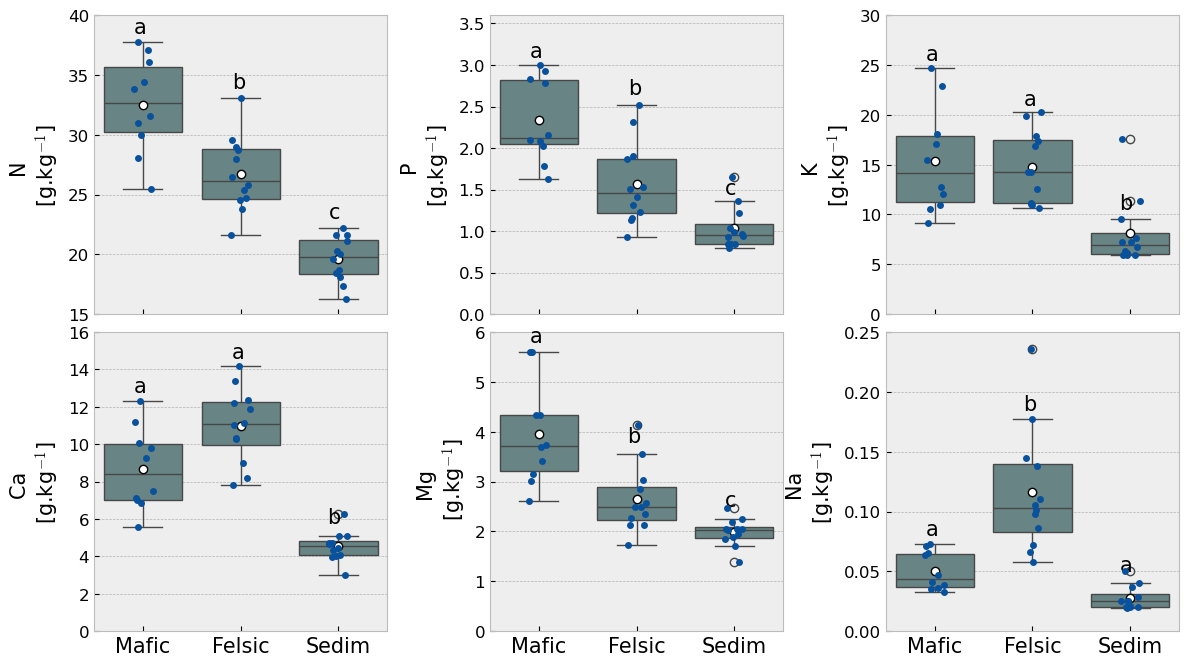

In [111]:
#from matplotlib.font_manager import _Weight
fig=plt.figure(figsize=[14,8])
plt.subplots_adjust(wspace=0.35, hspace=0.06)
plt.style.use('bmh')
#plotting N concetration in the canopy living leaves
plt.subplot(2,3,1)
colors={"Mafic":"#00AFBB", "Felsic":"#E7B800", "Sedim":"#FC4E07"}
b=sns.boxplot(x='region', y='N_mass', data=traits_agg,color="#638889",showmeans=True, meanprops={"marker":"o",
                       "markerfacecolor":"white",
                       "markeredgecolor":"black"})

#plt.text(2.4,38.5, "(a)", horizontalalignment='right', size=15, color='black', weight='bold')
plt.text(0.04,38.5, "a", horizontalalignment='right', size=15, color='black')
plt.text(1.05,33.9, "b", horizontalalignment='right', size=15, color='black')
plt.text(2.02,23, "c", horizontalalignment='right', size=15, color='black')
plt.ylim(15,40)

sns.stripplot(x='region',
                            y='N_mass',

                            jitter=True,
                            dodge=True,
                            marker='o',
                            color="#08519c",
                            alpha=1,
                            data=traits_agg)
ax = plt.gca()
ax.axes.xaxis.set_ticklabels("")
plt.ylabel('N \n[g.kg$^{-1}$]',size=15)
plt.xlabel("")
plt.xticks(fontsize=15)
plt.yticks(fontsize=12)
#plotting P concetration in the canopy living leaves
plt.subplot(2,3,2)
colors={"Mafic":"#00AFBB", "Felsic":"#E7B800", "Sedimentary":"#FC4E07"}
c=sns.boxplot(x='region', y='P', data=traits_agg,color="#638889",showmeans=True, meanprops={"marker":"o",
                       "markerfacecolor":"white",
                       "markeredgecolor":"black"})


#plt.text(2.4,3.4, "(a)", horizontalalignment='right', size=15, color='black',weight='bold')
plt.text(0.04,3.1, "a", horizontalalignment='right', size=15, color='black')
plt.text(1.05,2.65, "b", horizontalalignment='right', size=15, color='black')
plt.text(2.02,1.45, "c", horizontalalignment='right', size=15, color='black')
plt.ylim(0,3.6)

sns.stripplot(x='region',
                            y='P',

                            jitter=True,
                            dodge=True,
                            marker='o',
                            color="#08519c",
                            alpha=1,
                            data=traits_agg)
plt.ylabel('P \n[g.kg$^{-1}$]',size=15)
ax = plt.gca()
ax.axes.xaxis.set_ticklabels("")
plt.xlabel("")
plt.xticks(fontsize=15)
plt.yticks(fontsize=12)

#plotting K concetration in the canopy living leaves
plt.subplot(2,3,3)
colors={"Mafic":"#00AFBB", "Felsic":"#E7B800", "Sedimentary":"#FC4E07"}
sns.boxplot(x='region', y='K', data=traits_agg,color="#638889",showmeans=True, meanprops={"marker":"o",
                       "markerfacecolor":"white",
                       "markeredgecolor":"black"})


#plt.text(2.4,28, "(b)", horizontalalignment='right', size=15, color='black',weight='bold')
plt.text(0.04,25.5, "a", horizontalalignment='right', size=15, color='black')
plt.text(1.04,21, "a", horizontalalignment='right', size=15, color='black')
plt.text(2.02,10.5, "b", horizontalalignment='right', size=15, color='black')
plt.ylim(0,30)
plt.yticks(fontsize=15)
sns.stripplot(x='region',
                            y='K',

                            jitter=True,
                            dodge=True,
                            marker='o',
                            color="#08519c",
                            alpha=1,
                            data=traits_agg)

ax=plt.gca()
ax.axes.xaxis.set_ticklabels("")
plt.xlabel("")
plt.xlabel("")
plt.yticks(fontsize=12)
plt.xticks(fontsize=15)
plt.ylabel('K \n[g.kg$^{-1}$]',size=15)


#plotting Ca concetration in the canopy living leaves
plt.subplot(2,3,4)

sns.boxplot(x='region', y='Ca', data=traits_agg, color="#638889",showmeans=True, meanprops={"marker":"o",
                       "markerfacecolor":"white",
                       "markeredgecolor":"black"})



#plt.text(2.4,14.8, "(a)", horizontalalignment='right', size=15, color='black',weight='bold')
plt.text(0.04,12.8, "a", horizontalalignment='right', size=15, color='black')
plt.text(1.04,14.6, "a", horizontalalignment='right', size=15, color='black')
plt.text(2.02,5.8, "b", horizontalalignment='right', size=15, color='black')
plt.ylim(0,16)
sns.stripplot(x='region',
                            y='Ca',

                            jitter=True,
                            dodge=True,
                            marker='o',
                            color="#08519c",
                            alpha=1,
                            data=traits_agg)
plt.xlabel("")
plt.yticks(fontsize=12)
plt.xticks(fontsize=15)
plt.ylabel('Ca \n[g.kg$^{-1}$]',size=15)

#plotting Mg concetration in the canopy living leaves
plt.subplot(2,3,5)
sns.boxplot(x='region', y='Mg', data=traits_agg,color="#638889",showmeans=True, meanprops={"marker":"o",
                       "markerfacecolor":"white",
                       "markeredgecolor":"black"})

#plt.text(2.4,5.6, "(a)", horizontalalignment='right', size=15, color='black',weight='bold')
plt.text(0.04,5.8, "a", horizontalalignment='right', size=15, color='black')
plt.text(1.04,3.8, "b", horizontalalignment='right', size=15, color='black')
plt.text(2.02,2.5, "c", horizontalalignment='right', size=15, color='black')
plt.ylim(0,6)

sns.stripplot(x='region',
                            y='Mg',

                            jitter=True,
                            dodge=True,
                            marker='o',
                            color="#08519c",
                            alpha=1,
                            data=traits_agg)
ax=plt.gca()
plt.xlabel("")
plt.yticks(fontsize=12)
plt.xticks(fontsize=15)
plt.ylabel('Mg \n [g.kg$^{-1}$]',size=15)

plt.subplot(2,3,6)
sns.boxplot(x='region', y='Na', data=traits_agg,color="#638889",showmeans=True, meanprops={"marker":"o",
                       "markerfacecolor":"white",
                       "markeredgecolor":"black"})

plt.ylabel("Na \n [g/Kg]", size=15)

#plt.text(2.4,0.234, "(d)", horizontalalignment='right', size=15, color='black',weight='bold')
plt.text(0.04,0.08, "a", horizontalalignment='right', size=15, color='black')
plt.text(1.04,0.185, "b", horizontalalignment='right', size=15, color='black')
plt.text(2.02,0.05, "a", horizontalalignment='right', size=15, color='black')
plt.ylim(0,0.25)

sns.stripplot(x='region',
                            y='Na',

                            jitter=True,
                            dodge=True,
                            marker='o',
                            color="#08519c",
                            alpha=1,
                            data=traits_agg)
ax=plt.gca()
plt.xlabel("")
plt.yticks(fontsize=12)
plt.xticks(fontsize=15)

plt.ylabel('Na \n[g.kg$^{-1}$]',size=15);
fig.savefig('figures/Fig1.png', dpi=600,bbox_inches='tight', pad_inches=0);

## Loading litter data and calculating resorption efficiency




In [ ]:
#load the data from Jeremy's work. tht is litterfall data for the same regions
litter_data=pd.read_excel('04_data/1_original/Jeremy_files/230420_PLANT_JEREMY.xlsx')

litter_data.head()

,Solution Label,Al 396.152 nm ppm,Al_mg_kg_dry_weight,Ca 422.673 nm ppm,Ca_mg_kg_dry_weight,Fe 234.350 nm ppm,Fe_mg_kg_dry_weight,K 766.491 nm ppm,K_mg_kg_dry_weight,Mg 285.213 nm ppm,...,Dry_weight_kg,Label_ID,Dilution_Factor,Extraction_volume_l,plotID,BLK_Average_Fe,BLK_average_K,BLK_Average_P,Season,Region
0,Jeremy_1,0.737,589.776933,30.12,24103.23097,0.71,318.095429,8.83,5631.689507,4.66,...,0.000200,J01,4.0,0.04,UPL1,0.3125,1.7925,0.519,WR,UPL
1,Jeremy_2,0.706,572.819473,30.40,24665.31440,0.68,298.174442,10.01,6667.342799,4.11,...,0.000197,J02,4.0,0.04,UPL1,NaN,NaN,NaN,WD,UPL
2,Jeremy_3,0.442,349.925779,26.07,20639.28748,0.43,93.023256,11.78,7906.976744,3.53,...,0.000202,J03,4.0,0.04,UPL1,NaN,NaN,NaN,SR,UPL
3,Jeremy_4,0.690,545.185185,29.03,22937.28395,0.64,258.765432,8.97,5671.111111,3.81,...,0.000202,J04,4.0,0.04,UPL1,NaN,NaN,NaN,SD,UPL
4,Jeremy_5,0.323,249.000241,25.85,19927.72826,0.38,52.035654,7.78,4615.755240,3.64,...,0.000208,J05,4.0,0.04,UPL2,NaN,NaN,NaN,WR,UPL


In [ ]:
#subset the litter data to have a smaller size of the data
litter_data=litter_data[['plotID','Season','Ca_mg_kg_dry_weight', 'K_mg_kg_dry_weight',
       'Mg_mg_kg_dry_weight',
       'P_mg_kg_dry_weight']]

litter_data.head()

,plotID,Season,Ca_mg_kg_dry_weight,K_mg_kg_dry_weight,Mg_mg_kg_dry_weight,P_mg_kg_dry_weight
0,UPL1,WR,24103.23097,5631.689507,3729.118736,977.093128
1,UPL1,WD,24665.31440,6667.342799,3334.685598,894.117647
2,UPL1,SR,20639.28748,7906.976744,2794.656111,729.935675
3,UPL1,SD,22937.28395,5671.111111,3010.370370,820.938272
4,UPL2,WR,19927.72826,4615.755240,2806.070826,1131.679113


In [ ]:
#check data types and general information
litter_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   plotID               126 non-null    object 
 1   Season               122 non-null    object 
 2   Ca_mg_kg_dry_weight  126 non-null    float64
 3   K_mg_kg_dry_weight   126 non-null    float64
 4   Mg_mg_kg_dry_weight  126 non-null    float64
 5   P_mg_kg_dry_weight   126 non-null    float64
dtypes: float64(4), object(2)
memory usage: 6.0+ KB


In [ ]:
from numpy.ma.extras import isin
# write a function that converts all values to g/kg of biomass

numeric_columns=['Ca_mg_kg_dry_weight', 'K_mg_kg_dry_weight',
       'Mg_mg_kg_dry_weight',
       'P_mg_kg_dry_weight']

def convert_cols(df):
  for column in numeric_columns:
    df[column]=df[column]/1000

  return df

# apply the function to the litter dataframe
litter_df=convert_cols(litter_data)

litter_df.head()

,plotID,Season,Ca_mg_kg_dry_weight,K_mg_kg_dry_weight,Mg_mg_kg_dry_weight,P_mg_kg_dry_weight
0,UPL1,WR,24.103231,5.631690,3.729119,0.977093
1,UPL1,WD,24.665314,6.667343,3.334686,0.894118
2,UPL1,SR,20.639287,7.906977,2.794656,0.729936
3,UPL1,SD,22.937284,5.671111,3.010370,0.820938
4,UPL2,WR,19.927728,4.615755,2.806071,1.131679


In [ ]:
#check if plotID column is correct in the litter data too
print(litter_df.shape)
print(litter_df.plotID.unique())

(126, 6)
['UPL1' 'UPL2' 'UPL3' 'UPL4' 'UPL5' 'UPL6' 'UPL7' 'UPL8' 'UPL9' 'UPL10'
 'UPL11' 'UPL12' 'IPE_1_4_157_45' 'IPE_2_1_124_46' 'BLK1' 'BLK2' 'KBPL6'
 'KBPL11' 'KBPL12' 'KBPL13' 'KBPL14' 'KBPL15' 'KBPL16' 'NPL1' 'NPL2'
 'NPL3' 'NPL4' 'NPL6' 'NPL7' 'NPL8' 'NPL9' 'NPL10' 'NPL11' 'NPL12'
 'KBPL10']


In [ ]:
#remove rows that represents standards
list_values=['IPE_1_4_157_45','IPE_2_1_124_46', 'BLK1', 'BLK2']
litter_df=litter_df[litter_df.plotID.isin(list_values)==False]
#check if plotID column is now correct in the litter
print(litter_df.shape)
print(litter_df.plotID.unique())


(118, 6)
['UPL1' 'UPL2' 'UPL3' 'UPL4' 'UPL5' 'UPL6' 'UPL7' 'UPL8' 'UPL9' 'UPL10'
 'UPL11' 'UPL12' 'KBPL6' 'KBPL11' 'KBPL12' 'KBPL13' 'KBPL14' 'KBPL15'
 'KBPL16' 'NPL1' 'NPL2' 'NPL3' 'NPL4' 'NPL6' 'NPL7' 'NPL8' 'NPL9' 'NPL10'
 'NPL11' 'NPL12' 'KBPL10']


In this dataset the plotID will change as follows:

KBPL13>>>>>>KBPL5

KBPL14>>>>>>KBPL1

KBPL15>>>>>>KBPL8

KBPL16>>>>>>KBPL9

In [ ]:
#rename plotID
# litter_df=litter_df.replace({"plotID":{"KBPL13":"KBPL5","KBPL14":"KBPL1",
#                                        "KBPL15":"KBPL8","KBPL16":"KBPL9"}})

# print(litter_df.plotID.unique())

['UPL1' 'UPL2' 'UPL3' 'UPL4' 'UPL5' 'UPL6' 'UPL7' 'UPL8' 'UPL9' 'UPL10'
 'UPL11' 'UPL12' 'KBPL6' 'KBPL11' 'KBPL12' 'KBPL5' 'KBPL1' 'KBPL8' 'KBPL9'
 'NPL1' 'NPL2' 'NPL3' 'NPL4' 'NPL6' 'NPL7' 'NPL8' 'NPL9' 'NPL10' 'NPL11'
 'NPL12' 'KBPL10']


In [ ]:
#load litter fall CN data
wb= gc.open('litter_cn').sheet1

# get_all_values gives a list of rows.
rows = wb.get_all_values()

#Convert to a DataFrame and render
litter_cn=pd.DataFrame.from_records(rows, columns=["plotID","region","Season","litter_C",	"litter_N"])
litter_cn=litter_cn.drop(index=0)
litter_cn.head()

,plotID,region,Season,litter_C,litter_N
1,KBPL10,Mafic,SR,42.80,2.20
2,KBPL11,Mafic,WR,43.70,1.80
3,KBPL11,Mafic,WD,43.60,2.00
4,KBPL11,Mafic,SR,43.60,1.60
5,KBPL11,Mafic,SD,43.40,1.90


In [ ]:
litter_cn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118 entries, 1 to 118
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   plotID    118 non-null    object
 1   region    118 non-null    object
 2   Season    118 non-null    object
 3   litter_C  118 non-null    object
 4   litter_N  118 non-null    object
dtypes: object(5)
memory usage: 4.7+ KB


In [ ]:
#convert data type
litter_cn["litter_N2"]=litter_cn["litter_N"].astype("float")
litter_cn["litter_C2"]=litter_cn["litter_C"].astype("float")
litter_cn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118 entries, 1 to 118
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   plotID     118 non-null    object 
 1   region     118 non-null    object 
 2   Season     118 non-null    object 
 3   litter_C   118 non-null    object 
 4   litter_N   118 non-null    object 
 5   litter_N2  118 non-null    float64
 6   litter_C2  118 non-null    float64
dtypes: float64(2), object(5)
memory usage: 6.6+ KB


In [ ]:
litter_cn.head()

,plotID,region,Season,litter_C,litter_N,litter_N2,litter_C2
1,KBPL10,Mafic,SR,42.80,2.20,2.2,42.8
2,KBPL11,Mafic,WR,43.70,1.80,1.8,43.7
3,KBPL11,Mafic,WD,43.60,2.00,2.0,43.6
4,KBPL11,Mafic,SR,43.60,1.60,1.6,43.6
5,KBPL11,Mafic,SD,43.40,1.90,1.9,43.4


In [ ]:
#convert litterfall c an N in g/kg
litter_cn["litter_C"]=litter_cn["litter_C2"]*10
litter_cn["litter_N"]=litter_cn["litter_N2"]*10
litter_cn=litter_cn.drop(columns=["litter_C2","litter_N2"])
litter_cn.head()

,plotID,region,Season,litter_C,litter_N
1,KBPL10,Mafic,SR,428.0,22.0
2,KBPL11,Mafic,WR,437.0,18.0
3,KBPL11,Mafic,WD,436.0,20.0
4,KBPL11,Mafic,SR,436.0,16.0
5,KBPL11,Mafic,SD,434.0,19.0


In [ ]:
#check if seasons are described in the same way in all litter data
print(litter_df.Season.unique())
print(litter_cn.Season.unique())

['WR' 'WD' 'SR' 'SD']
['SR' 'WR' 'WD' 'SD']


In [ ]:
print(litter_cn.plotID.unique())

['KBPL10' 'KBPL11' 'KBPL12' 'KBPL13' 'KBPL14' 'KBPL15' 'KBPL16' 'KBPL6'
 'NPL1' 'NPL10' 'NPL11' 'NPL12' 'NPL2' 'NPL3' 'NPL4' 'NPL6' 'NPL7' 'NPL8'
 'NPL9' 'UPL1' 'UPL10' 'UPL11' 'UPL12' 'UPL2' 'UPL3' 'UPL4' 'UPL5' 'UPL6'
 'UPL7' 'UPL8' 'UPL9']


In [ ]:
#rename plotID in litter CN data
# litter_cn=litter_cn.replace({"plotID":{"KBPL13":"KBPL5","KBPL14":"KBPL1",
#                                        "KBPL15":"KBPL8","KBPL16":"KBPL9"}})

# print(litter_cn.plotID.unique())

In [ ]:
#merge liter data and litter CN data
litter_df=litter_df.merge(litter_cn, on=["plotID","Season"], how="left")

litter_df.head()

,plotID,Season,Ca_mg_kg_dry_weight,K_mg_kg_dry_weight,Mg_mg_kg_dry_weight,P_mg_kg_dry_weight,region,litter_C,litter_N
0,UPL1,WR,24.103231,5.631690,3.729119,0.977093,Felsic,421.0,24.0
1,UPL1,WD,24.665314,6.667343,3.334686,0.894118,Felsic,443.0,23.0
2,UPL1,SR,20.639287,7.906977,2.794656,0.729936,Felsic,419.0,22.0
3,UPL1,SD,22.937284,5.671111,3.010370,0.820938,Felsic,423.0,24.0
4,UPL1,SD,22.937284,5.671111,3.010370,0.820938,Felsic,413.0,23.0


In [ ]:
#check that regions match plotIDs
litter_df.query('region=="Sedimentary"')

In [ ]:
#Verify missing values in the litter data

litter_df.isna().sum()

plotID                 0
Season                 0
Ca_mg_kg_dry_weight    0
K_mg_kg_dry_weight     0
Mg_mg_kg_dry_weight    0
P_mg_kg_dry_weight     0
region                 6
litter_C               6
litter_N               6
dtype: int64

In [ ]:
litter_df_agg=litter_df.groupby(by="plotID").mean().reset_index()
litter_df_agg.head()

<ipython-input-27-12266e520664>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  litter_df_agg=litter_df.groupby(by="plotID").mean().reset_index()


,plotID,Ca_mg_kg_dry_weight,K_mg_kg_dry_weight,Mg_mg_kg_dry_weight,P_mg_kg_dry_weight,litter_C,litter_N
0,KBPL10,17.213000,8.920000,4.113000,2.233000,428.00,22.00
1,KBPL11,18.272905,7.237891,4.011445,1.622903,435.75,18.25
2,KBPL12,16.684012,3.713351,7.018714,1.946526,443.75,19.50
3,KBPL13,15.501099,3.279406,7.526173,1.596852,431.00,20.50
4,KBPL14,14.480983,2.560095,7.432306,1.399055,439.25,26.00


In [ ]:
#Verify missing values in the litter data again
print(litter_df_agg.shape)
litter_df_agg.isna().sum()

(31, 7)


plotID                 0
Ca_mg_kg_dry_weight    0
K_mg_kg_dry_weight     0
Mg_mg_kg_dry_weight    0
P_mg_kg_dry_weight     0
litter_C               0
litter_N               0
dtype: int64

In [ ]:
print(litter_df_agg.plotID.unique())
print(traits_agg.plotID.unique())

['KBPL10' 'KBPL11' 'KBPL12' 'KBPL13' 'KBPL14' 'KBPL15' 'KBPL16' 'KBPL6'
 'NPL1' 'NPL10' 'NPL11' 'NPL12' 'NPL2' 'NPL3' 'NPL4' 'NPL6' 'NPL7' 'NPL8'
 'NPL9' 'UPL1' 'UPL10' 'UPL11' 'UPL12' 'UPL2' 'UPL3' 'UPL4' 'UPL5' 'UPL6'
 'UPL7' 'UPL8' 'UPL9']
['KBPL1' 'KBPL10' 'KBPL11' 'KBPL12' 'KBPL4' 'KBPL5' 'KBPL6' 'KBPL7'
 'KBPL8' 'KBPL9' 'UPL1' 'UPL10' 'UPL11' 'UPL12' 'UPL2' 'UPL3' 'UPL4'
 'UPL5' 'UPL6' 'UPL7' 'UPL8' 'UPL9' 'NPL1' 'NPL10' 'NPL11' 'NPL12' 'NPL2'
 'NPL3' 'NPL4' 'NPL5' 'NPL6' 'NPL7' 'NPL8' 'NPL9']


In [ ]:
#merge the litter data and fresh leaves
litter_fresh_df_agg=litter_df_agg.merge(traits_agg[["plotID","region","slope","N_mass","C_mass","P","K","CN","NP","Mg","Ca"]], on="plotID", how="inner")
print(litter_fresh_df_agg.shape)
litter_fresh_df_agg.head()

(27, 17)


,plotID,Ca_mg_kg_dry_weight,K_mg_kg_dry_weight,Mg_mg_kg_dry_weight,P_mg_kg_dry_weight,litter_C,litter_N,region,slope,N_mass,C_mass,P,K,CN,NP,Mg,Ca
0,KBPL10,17.213000,8.920000,4.113000,2.233000,428.000000,22.000000,Mafic,V,33.857574,455.139414,2.926664,17.117632,13.442765,11.568656,3.696900,12.319769
1,KBPL11,18.272905,7.237891,4.011445,1.622903,435.750000,18.250000,Mafic,V,28.049149,462.611250,2.833704,15.504388,16.492880,9.898405,3.143740,11.207066
2,KBPL12,16.684012,3.713351,7.018714,1.946526,443.750000,19.500000,Mafic,V,25.471390,484.933781,1.630316,10.967192,19.038372,15.623589,3.007433,6.852107
3,KBPL6,18.634068,4.807062,5.470394,1.727377,436.000000,25.333333,Mafic,UP,31.531142,456.493925,2.161889,10.539101,14.477558,14.584993,5.608900,9.281973
4,NPL1,5.459219,0.782710,1.338704,0.187631,470.571429,17.285714,Mixed,PL,18.656642,493.595290,0.986371,7.222998,26.456813,18.914429,2.195004,6.263890


In [ ]:
litter_fresh_df_agg.plotID.unique()

array(['KBPL10', 'KBPL11', 'KBPL12', 'KBPL6', 'NPL1', 'NPL10', 'NPL11',
       'NPL12', 'NPL2', 'NPL3', 'NPL4', 'NPL6', 'NPL7', 'NPL8', 'NPL9',
       'UPL1', 'UPL10', 'UPL11', 'UPL12', 'UPL2', 'UPL3', 'UPL4', 'UPL5',
       'UPL6', 'UPL7', 'UPL8', 'UPL9'], dtype=object)

In [ ]:
#calculating the average change in K and P
litter_fresh_df_agg["tracer"]=litter_fresh_df_agg["Ca_mg_kg_dry_weight"]/litter_fresh_df_agg["Ca"]
litter_fresh_df_agg["lit_N_adj"]=litter_fresh_df_agg["litter_N"]/litter_fresh_df_agg["tracer"]
litter_fresh_df_agg["lit_K_adj"]=litter_fresh_df_agg["K_mg_kg_dry_weight"]/litter_fresh_df_agg["tracer"]
litter_fresh_df_agg["lit_P_adj"]=litter_fresh_df_agg["P_mg_kg_dry_weight"]/litter_fresh_df_agg["tracer"]
litter_fresh_df_agg["lit_Mg_adj"]=litter_fresh_df_agg["Mg_mg_kg_dry_weight"]/litter_fresh_df_agg["tracer"]
litter_fresh_df_agg["N_resorp"]=(litter_fresh_df_agg["N_mass"]-litter_fresh_df_agg["lit_N_adj"])*100/litter_fresh_df_agg["N_mass"]
litter_fresh_df_agg["K_resorp"]=(litter_fresh_df_agg["K"]-litter_fresh_df_agg["lit_K_adj"])*100/litter_fresh_df_agg["K"]
litter_fresh_df_agg["P_resorp"]=(litter_fresh_df_agg["P"]-litter_fresh_df_agg["lit_P_adj"])*100/litter_fresh_df_agg["P"]
litter_fresh_df_agg["Mg_resorp"]=(litter_fresh_df_agg["Mg"]-litter_fresh_df_agg["lit_Mg_adj"])*100/litter_fresh_df_agg["Mg"]
litter_fresh_df_agg.head()

,plotID,Ca_mg_kg_dry_weight,K_mg_kg_dry_weight,Mg_mg_kg_dry_weight,P_mg_kg_dry_weight,litter_C,litter_N,region,slope,N_mass,...,Ca,tracer,lit_N_adj,lit_K_adj,lit_P_adj,lit_Mg_adj,N_resorp,K_resorp,P_resorp,Mg_resorp
0,KBPL10,17.213000,8.920000,4.113000,2.233000,428.000000,22.000000,Mafic,V,33.857574,...,12.319769,1.397185,15.745943,6.384264,1.598213,2.943776,53.493589,62.703580,45.391308,20.371786
1,KBPL11,18.272905,7.237891,4.011445,1.622903,435.750000,18.250000,Mafic,V,28.049149,...,11.207066,1.630481,11.193018,4.439115,0.995352,2.460283,60.094982,71.368655,64.874511,21.740237
2,KBPL12,16.684012,3.713351,7.018714,1.946526,443.750000,19.500000,Mafic,V,25.471390,...,6.852107,2.434873,8.008630,1.525069,0.799436,2.882579,68.558330,86.094258,50.964346,4.151535
3,KBPL6,18.634068,4.807062,5.470394,1.727377,436.000000,25.333333,Mafic,UP,31.531142,...,9.281973,2.007555,12.619001,2.394486,0.860438,2.724904,59.979246,77.279978,60.199699,51.418205
4,NPL1,5.459219,0.782710,1.338704,0.187631,470.571429,17.285714,Mixed,PL,18.656642,...,6.263890,0.871538,19.833572,0.898079,0.215288,1.536024,-6.308370,87.566394,78.173771,30.021796


In [ ]:
litter_fresh_df_agg.region.unique()

array(['Mafic', 'Mixed', 'Felsic'], dtype=object)

In [ ]:
#check that region names are correct
litter_fresh_df_agg=litter_fresh_df_agg.replace({"region":{"Mixed":"Sedim"}})
print(litter_fresh_df_agg.region.unique())

In [ ]:
#replace zeros to avoid vdivision with zero which resulted in infinity
#litter_fresh_df_agg=litter_fresh_df_agg.replace([np.inf, -np.inf],0)
litter_fresh_df_agg.query('region=="Mixed"')

In [ ]:
litter_fresh_df_agg.query('region=="Sedimentary"')["N_resorp"].mean()

38.94361167125278

In [ ]:
#litter_fresh_df_agg["N_resorp"]=litter_fresh_df_agg["N_resorp"])
# litter_fresh_df_agg[litter_fresh_df_agg["N_resorp"]<0]=39.0
# litter_fresh_df_agg.query('region=="Sedimentary"')["N_resorp"]


In [3]:
#export the cleaned data
#litter_fresh_df_agg.to_csv("litter_fresh_df_agg.csv", index=False)
#load the saved data to avoid further processing each time we want to use the same data
litter_fresh_df_agg=pd.read_csv("/home/drdc/Documents/repos/Portfolio/eco-analysis/processed/litter_fresh_df_agg.csv")
litter_fresh_df_agg.head()

,plotID,Ca_mg_kg_dry_weight,K_mg_kg_dry_weight,Mg_mg_kg_dry_weight,P_mg_kg_dry_weight,litter_C,litter_N,region,slope,N_mass,...,Ca,tracer,lit_N_adj,lit_K_adj,lit_P_adj,lit_Mg_adj,N_resorp,K_resorp,P_resorp,Mg_resorp
0,KBPL10,17.213000,8.920000,4.113000,2.233000,428.000000,22.000000,Mafic,V,33.857574,...,12.319769,1.397185,15.745943,6.384264,1.598213,2.943776,53.493589,62.703580,45.391308,20.371786
1,KBPL11,18.272905,7.237891,4.011445,1.622903,435.750000,18.250000,Mafic,V,28.049149,...,11.207066,1.630481,11.193018,4.439115,0.995352,2.460283,60.094982,71.368655,64.874511,21.740237
2,KBPL12,16.684012,3.713351,7.018714,1.946526,443.750000,19.500000,Mafic,V,25.471390,...,6.852107,2.434873,8.008630,1.525069,0.799436,2.882579,68.558330,86.094258,50.964346,4.151535
3,KBPL6,18.634068,4.807062,5.470394,1.727377,436.000000,25.333333,Mafic,UP,31.531142,...,9.281973,2.007555,12.619001,2.394486,0.860438,2.724904,59.979246,77.279978,60.199699,51.418205
4,NPL1,5.459219,0.782710,1.338704,0.187631,470.571429,17.285714,Sedimentary,PL,18.656642,...,6.263890,0.871538,19.833572,0.898079,0.215288,1.536024,-6.308370,87.566394,78.173771,30.021796


In [4]:
litter_fresh_df_agg["NP_resorp"]=litter_fresh_df_agg["N_resorp"]/litter_fresh_df_agg["P_resorp"]
litter_fresh_df_agg["NK_resorp"]=litter_fresh_df_agg["N_resorp"]/litter_fresh_df_agg["K_resorp"]
litter_fresh_df_agg.head()

,plotID,Ca_mg_kg_dry_weight,K_mg_kg_dry_weight,Mg_mg_kg_dry_weight,P_mg_kg_dry_weight,litter_C,litter_N,region,slope,N_mass,...,lit_N_adj,lit_K_adj,lit_P_adj,lit_Mg_adj,N_resorp,K_resorp,P_resorp,Mg_resorp,NP_resorp,NK_resorp
0,KBPL10,17.213000,8.920000,4.113000,2.233000,428.000000,22.000000,Mafic,V,33.857574,...,15.745943,6.384264,1.598213,2.943776,53.493589,62.703580,45.391308,20.371786,1.178499,0.853119
1,KBPL11,18.272905,7.237891,4.011445,1.622903,435.750000,18.250000,Mafic,V,28.049149,...,11.193018,4.439115,0.995352,2.460283,60.094982,71.368655,64.874511,21.740237,0.926327,0.842036
2,KBPL12,16.684012,3.713351,7.018714,1.946526,443.750000,19.500000,Mafic,V,25.471390,...,8.008630,1.525069,0.799436,2.882579,68.558330,86.094258,50.964346,4.151535,1.345221,0.796317
3,KBPL6,18.634068,4.807062,5.470394,1.727377,436.000000,25.333333,Mafic,UP,31.531142,...,12.619001,2.394486,0.860438,2.724904,59.979246,77.279978,60.199699,51.418205,0.996338,0.776129
4,NPL1,5.459219,0.782710,1.338704,0.187631,470.571429,17.285714,Sedimentary,PL,18.656642,...,19.833572,0.898079,0.215288,1.536024,-6.308370,87.566394,78.173771,30.021796,-0.080697,-0.072041


In [5]:
#check that region names are correct
litter_fresh_df_agg=litter_fresh_df_agg.replace({"region":{"Sedimentary":"Sedim"}})
print(litter_fresh_df_agg.region.unique())

['Mafic' 'Sedim' 'Felsic']


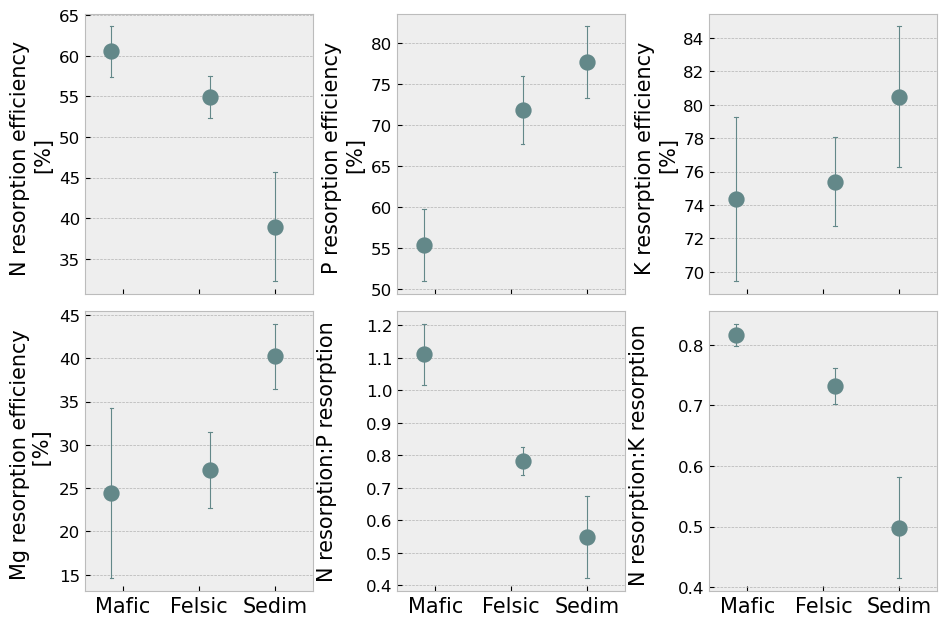

In [8]:
#create point plots
fig=plt.figure(figsize=[11,7.5])
plt.style.use('bmh')

#colors={"Mafic":"#008170", "Felsic":"#99B080", "Sedim":"#E7B800"}
colors={"Mafic":"#638889", "Felsic":"#638889", "Sedim":"#638889"}

plt.subplots_adjust(wspace=0.37, hspace=0.06)

plt.subplot(2,3,1)

sns.pointplot(x="region",y='N_resorp',hue="region",estimator="mean",errorbar="se", capsize=.05, linestyles="", dodge=0.3,
err_kws={'linewidth': 0.8},palette=colors,data=litter_fresh_df_agg,order=colors)
plt.xlabel("")
plt.ylabel('N resorption efficiency \n[%]',size=15)
plt.yticks(fontsize=12)
#plt.legend(loc="upper left")
ax=plt.gca()
ax.axes.xaxis.set_ticklabels("")


plt.subplot(2,3,2)
sns.pointplot(x="region",y='P_resorp',hue="region",estimator="mean",errorbar="se", capsize=.05, linestyles="", dodge=0.3,
err_kws={'linewidth': 0.8},palette=colors,data=litter_fresh_df_agg,order=colors)
plt.xlabel("")
plt.ylabel('P resorption efficiency \n[%]',size=15)
plt.yticks(fontsize=12)
ax=plt.gca()
ax.axes.xaxis.set_ticklabels("")

plt.subplot(2,3,3)
sns.pointplot(x="region",y='K_resorp',hue="region",estimator="mean",errorbar="se", capsize=.05, linestyles="", dodge=0.3,
err_kws={'linewidth': 0.8},order=colors,palette=colors,data=litter_fresh_df_agg)
plt.xlabel("")
plt.ylabel('K resorption efficiency \n[%]',size=15)
plt.yticks(fontsize=12)

ax=plt.gca()
ax.axes.xaxis.set_ticklabels("")

plt.subplot(2,3,4)

sns.pointplot(x="region",y='Mg_resorp',hue="region",estimator="mean",errorbar="se", capsize=.05, linestyles="", dodge=0.3,
err_kws={'linewidth': 0.8},palette=colors,data=litter_fresh_df_agg,order=colors)
plt.xlabel("")
plt.ylabel('Mg resorption efficiency \n [%]',size=15)
plt.yticks(fontsize=12)
plt.xticks(fontsize=15)
# ax=plt.gca()
# ax.axes.xaxis.set_ticklabels("")


plt.subplot(2,3,5)
sns.pointplot(x="region",y='NP_resorp',hue="region",estimator="mean",errorbar="se", capsize=.05, linestyles="", dodge=0.3,
err_kws={'linewidth': 0.8},palette=colors,data=litter_fresh_df_agg,order=colors)
plt.xlabel("")
plt.ylabel('N resorption:P resorption\n',size=15)
plt.yticks(fontsize=12)
plt.xticks(fontsize=15)
#ax=plt.gca()
#ax.axes.xaxis.set_ticklabels("")


plt.subplot(2,3,6)
sns.pointplot(x="region",y='NK_resorp',hue="region",estimator="mean",errorbar="se",capsize=.05, linestyles="", dodge=0.3,
err_kws={'linewidth': 0.8},palette=colors,data=litter_fresh_df_agg,order=colors)
plt.ylabel('N resorption:K resorption \n',size=15)
plt.yticks(fontsize=12)
plt.xticks(fontsize=15)
plt.xlabel("");
#fig.savefig('figures/Fig3.png', dpi=600,bbox_inches='tight', pad_inches=0);


In [ ]:
#merging CN data for both litterfall and fresh leaves

litter_cn["CN"]=litter_cn["litter_C"]/litter_cn["litter_N"]
litter_cn["type"]="Litter fall"
traits_agg["type"]="Living leaves"
litter_cn.head()
#concatinate the two dataframe
cn_data=pd.concat([litter_cn[["plotID","region","CN","type"]],traits_agg[["plotID","region","CN","type"]]])
#rename regions
cn_data=cn_data.replace({"region":{"Mixed":"Sedimentary"}})
print(cn_data.shape)
cn_data.head()

(152, 4)


,plotID,region,CN,type
1,KBPL10,Mafic,19.454545,Litter fall
2,KBPL11,Mafic,24.277778,Litter fall
3,KBPL11,Mafic,21.800000,Litter fall
4,KBPL11,Mafic,27.250000,Litter fall
5,KBPL11,Mafic,22.842105,Litter fall


In [ ]:
#load the litter layer cllected on te ground

#load litter fall CN data
# wb_O_layer= gc.open('O_layer_cn').sheet1

# # get_all_values gives a list of rows.
# rows = wb_O_layer.get_all_values()

# #Convert to a DataFrame and render
# df_O_layer=pd.DataFrame.from_records(rows, columns=["sampleID","plotID","region","N_mean","C_mean",	"CN"])
# df_O_layer_cn=df_O_layer.drop(index=0)
# df_O_layer_cn["type"]="O-horizon"
# df_O_layer_cn.head()

,sampleID,plotID,region,N_mean,C_mean,CN,type
1,KBPL1CompO,KBP1,Mafic,2.83,40.06,14.15547703,O-horizon
2,KBPL10O,KBP10,Mafic,3,36.88,12.29333333,O-horizon
3,KBPL11O,KBP11,Mafic,1.88,22.69,12.06914894,O-horizon
4,KBPL12O,KBP12,Mafic,2.38,33.03,13.87815126,O-horizon
5,KBPL2CompO,KBP2,Mafic,2.54,41.43,16.31102362,O-horizon


In [ ]:
#load the litter layer

df_litter_layer=pd.read_excel("04_data/1_original/litter_layer_cn.xlsx")
df_litter_layer["type"]="Litter layer"
df_litter_layer.head()

,plotID,region,sampleID,Litter_n,litteter_c,CN,type
0,KBPL10,Mafic,KBPL10PL,2.509290,39.437630,15.716650,Litter layer
1,KBPL11,Mafic,KBPL11L,2.997642,41.174469,13.735618,Litter layer
2,KBPL1,Mafic,KBPL1L,2.576051,41.210064,15.997376,Litter layer
3,KBPL12,Mafic,KBPL12,2.753466,40.306049,14.726134,Litter layer
4,KBPL2,Mafic,KBPL2CompL,1.939930,45.299126,23.350906,Litter layer


In [ ]:
#concatinate all cn dataframes
all_cn_data=pd.concat([df_litter_layer[["plotID","region","CN","type"]],df_O_layer_cn[["plotID","region","CN","type"]], cn_data])
print(all_cn_data.type.unique())
all_cn_data.head()

['Litter layer' 'O-horizon' 'Litter fall' 'Living leaves']


,plotID,region,CN,type
0,KBPL10,Mafic,15.71665,Litter layer
1,KBPL11,Mafic,13.735618,Litter layer
2,KBPL1,Mafic,15.997376,Litter layer
3,KBPL12,Mafic,14.726134,Litter layer
4,KBPL2,Mafic,23.350906,Litter layer


In [ ]:
all_cn_data["CN"]=all_cn_data["CN"].astype("float")
all_cn_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 227 entries, 0 to 33
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   plotID  227 non-null    object 
 1   region  227 non-null    object 
 2   CN      227 non-null    float64
 3   type    227 non-null    object 
dtypes: float64(1), object(3)
memory usage: 8.9+ KB


In [ ]:
#export all CN data
#all_cn_data.to_csv("all_cn_data.csv", index=False)

In [9]:
#load the preprocessed data
all_cn_data=pd.read_csv("/home/drdc/Documents/repos/Portfolio/eco-analysis/processed/all_cn_data.csv")
#load soil data and sample ids
sample_id=pd.read_excel("/home/drdc/Documents/repos/Portfolio/eco-analysis/processed/sample_id.xlsx")
soil_10=pd.read_excel("/home/drdc/Documents/repos/Portfolio/eco-analysis/processed/soil_phy_chem.xlsx" )
CN_soil=pd.read_excel("/home/drdc/Documents/repos/Portfolio/eco-analysis/processed/soil_carbon.xlsx" )

soil_10=pd.merge(soil_10, sample_id, how='inner',on='sampleID', suffixes=("_x","_y"))

soil_10.head()

,sampleID,clay,silt,sand,BD_m_soil,WHC,pH_KCl,P_avail,exch_acidity_Al,exch_acidity_H,...,mean_Mn_ox_extract,sd_Mn_ox_extract,no_Mn_ox_extract,mean_Mn_dcb_extract,sd_Mn_dcb_extract,no_Mn_dcb_extract,plotID,depth,depth_int,region
0,KBPL10C1,46.88,14.0,39.12,0.822,0.44,5.40,32.78,0.0,0.758,...,0.19493,-9999.0,1,0.0734,-9999.0,1,KBPL10,C1,10cm,Mafic
1,KBPL10C2,-9999.00,-9999.0,-9999.00,1.091,-9999.00,-9999.00,-9999.00,-9999.0,-9999.000,...,-9999.00000,-9999.0,-9999,-9999.0000,-9999.0,-9999,KBPL10,C2,20cm,Mafic
2,KBPL10C3,-9999.00,-9999.0,-9999.00,1.093,-9999.00,-9999.00,-9999.00,-9999.0,-9999.000,...,-9999.00000,-9999.0,-9999,-9999.0000,-9999.0,-9999,KBPL10,C3,30cm,Mafic
3,KBPL11C1,27.60,10.0,62.40,0.654,0.46,4.35,35.25,0.0,1.900,...,-9999.00000,-9999.0,-9999,-9999.0000,-9999.0,-9999,KBPL11,C1,10cm,Mafic
4,KBPL11C2,-9999.00,-9999.0,-9999.00,0.746,-9999.00,-9999.00,-9999.00,-9999.0,-9999.000,...,-9999.00000,-9999.0,-9999,-9999.0000,-9999.0,-9999,KBPL11,C2,20cm,Mafic


In [10]:
soil_10=soil_10.query('depth=="C1"')
variables=["sampleID","plotID","region","clay","silt","sand","WHC","pH_KCl","P_avail","exch_bases_Na","exch_bases_K",
           "exch_bases_Ca","exch_bases_Mg","ECEC","bases_in_ECEC","mean_Ca_bulk_OES","mean_K_bulk_ICPOES",
           "mean_Mg_bulk_ICPOES","mean_Na_bulk_ICPOES","mean_P_bulk_ICPOES"]

soil_10=soil_10[variables]
soil_10.head()

,sampleID,plotID,region,clay,silt,sand,WHC,pH_KCl,P_avail,exch_bases_Na,exch_bases_K,exch_bases_Ca,exch_bases_Mg,ECEC,bases_in_ECEC,mean_Ca_bulk_OES,mean_K_bulk_ICPOES,mean_Mg_bulk_ICPOES,mean_Na_bulk_ICPOES,mean_P_bulk_ICPOES
0,KBPL10C1,KBPL10,Mafic,46.88,14.00,39.12,0.44,5.40,32.78,0.043,0.793,24.251,7.359,33.206,97.716,0.796442,0.138750,0.367500,0.043942,0.218462
3,KBPL11C1,KBPL11,Mafic,27.60,10.00,62.40,0.46,4.35,35.25,0.043,1.279,8.972,3.578,15.772,87.953,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000
6,KBPL12C1,KBPL12,Mafic,24.88,12.00,63.12,0.45,3.60,33.76,0.040,0.332,2.904,1.405,9.991,46.864,0.087402,0.088235,0.180588,0.015637,0.160000
9,KBPL1C1,KBPL1,Mafic,61.60,19.28,19.12,0.62,3.27,37.70,0.000,0.281,1.667,0.449,8.844,27.107,0.022400,0.086600,0.198500,0.019250,0.144700
12,KBPL2C1,KBPL2,Mafic,51.60,9.28,39.12,0.81,3.32,52.61,0.000,0.332,1.417,0.504,10.596,21.266,0.038776,0.091996,0.192732,0.023091,0.167157


In [11]:
#replace all values under detection limit with zero
soil_10=soil_10.replace({-9999.000000:0.1})
soil_10.head()

,sampleID,plotID,region,clay,silt,sand,WHC,pH_KCl,P_avail,exch_bases_Na,exch_bases_K,exch_bases_Ca,exch_bases_Mg,ECEC,bases_in_ECEC,mean_Ca_bulk_OES,mean_K_bulk_ICPOES,mean_Mg_bulk_ICPOES,mean_Na_bulk_ICPOES,mean_P_bulk_ICPOES
0,KBPL10C1,KBPL10,Mafic,46.88,14.00,39.12,0.44,5.40,32.78,0.043,0.793,24.251,7.359,33.206,97.716,0.796442,0.138750,0.367500,0.043942,0.218462
3,KBPL11C1,KBPL11,Mafic,27.60,10.00,62.40,0.46,4.35,35.25,0.043,1.279,8.972,3.578,15.772,87.953,0.100000,0.100000,0.100000,0.100000,0.100000
6,KBPL12C1,KBPL12,Mafic,24.88,12.00,63.12,0.45,3.60,33.76,0.040,0.332,2.904,1.405,9.991,46.864,0.087402,0.088235,0.180588,0.015637,0.160000
9,KBPL1C1,KBPL1,Mafic,61.60,19.28,19.12,0.62,3.27,37.70,0.000,0.281,1.667,0.449,8.844,27.107,0.022400,0.086600,0.198500,0.019250,0.144700
12,KBPL2C1,KBPL2,Mafic,51.60,9.28,39.12,0.81,3.32,52.61,0.000,0.332,1.417,0.504,10.596,21.266,0.038776,0.091996,0.192732,0.023091,0.167157


In [164]:
CN_soil.head()

,sampleID,N,C
0,NPL6C10,0.03394,0.45182
1,UPL5C10,0.06088,0.48983
2,UPL4C10,0.07082,0.54888
3,NPL3C10,0.05345,0.79065
4,KBPL3C10,0.11403,0.94792


In [12]:
soil_10=pd.merge(soil_10, CN_soil, how='inner',on='sampleID')
soil_10.head()

,sampleID,plotID,region,clay,silt,sand,WHC,pH_KCl,P_avail,exch_bases_Na,...,exch_bases_Mg,ECEC,bases_in_ECEC,mean_Ca_bulk_OES,mean_K_bulk_ICPOES,mean_Mg_bulk_ICPOES,mean_Na_bulk_ICPOES,mean_P_bulk_ICPOES,N,C
0,KBPL10C1,KBPL10,Mafic,46.88,14.00,39.12,0.44,5.40,32.78,0.043,...,7.359,33.206,97.716,0.796442,0.138750,0.367500,0.043942,0.218462,0.95088,8.58088
1,KBPL11C1,KBPL11,Mafic,27.60,10.00,62.40,0.46,4.35,35.25,0.043,...,3.578,15.772,87.953,0.100000,0.100000,0.100000,0.100000,0.100000,0.72923,7.53175
2,KBPL12C1,KBPL12,Mafic,24.88,12.00,63.12,0.45,3.60,33.76,0.040,...,1.405,9.991,46.864,0.087402,0.088235,0.180588,0.015637,0.160000,0.93539,9.74146
3,KBPL1C1,KBPL1,Mafic,61.60,19.28,19.12,0.62,3.27,37.70,0.000,...,0.449,8.844,27.107,0.022400,0.086600,0.198500,0.019250,0.144700,0.49309,4.73554
4,KBPL2C1,KBPL2,Mafic,51.60,9.28,39.12,0.81,3.32,52.61,0.000,...,0.504,10.596,21.266,0.038776,0.091996,0.192732,0.023091,0.167157,0.86402,11.14913


In [ ]:
all_cn_data.tail()

,plotID,region,CN,type
222,NPL5,Sedimentary,31.432815,Living leaves
223,NPL6,Sedimentary,22.322212,Living leaves
224,NPL7,Sedimentary,24.956845,Living leaves
225,NPL8,Sedimentary,22.234097,Living leaves
226,NPL9,Sedimentary,20.854974,Living leaves


In [ ]:
# Subset the CP and NP data from litter_fresh_df_agg
litter_CP_NP_df= litter_fresh_df_agg[["plotID","region","litter_C","lit_N_adj","lit_P_adj","lit_K_adj"]]
fresh_CP_NP_df=litter_fresh_df_agg[["plotID","region","C_mass","N_mass","P","NP","K"]]

#calculating further indices for litter
litter_CP_NP_df["CN"]=litter_CP_NP_df.litter_C/litter_CP_NP_df.lit_N_adj
litter_CP_NP_df["CP"]=litter_CP_NP_df.litter_C/litter_CP_NP_df.lit_P_adj
litter_CP_NP_df["NP"]=litter_CP_NP_df.lit_N_adj/litter_CP_NP_df.lit_P_adj
litter_CP_NP_df["CK"]=litter_CP_NP_df.litter_C/litter_CP_NP_df.lit_K_adj
litter_CP_NP_df["NK"]=litter_CP_NP_df.lit_N_adj/litter_CP_NP_df.lit_K_adj
litter_CP_NP_df["type"]="Litter fall"

#calculating further indices for fresh leaves
fresh_CP_NP_df["CN"]=fresh_CP_NP_df.C_mass/fresh_CP_NP_df.N_mass
fresh_CP_NP_df["CP"]=fresh_CP_NP_df.C_mass/fresh_CP_NP_df.P
fresh_CP_NP_df["NP"]=fresh_CP_NP_df.N_mass/fresh_CP_NP_df.P
fresh_CP_NP_df["CK"]=fresh_CP_NP_df.C_mass/fresh_CP_NP_df.K
fresh_CP_NP_df["NK"]=fresh_CP_NP_df.N_mass/fresh_CP_NP_df.K
fresh_CP_NP_df["type"]="Living leaves"

In [14]:
#calculating further indices for top soils 10cm

soil_10["CN"]=soil_10["C"]/soil_10["N"]
soil_10["CP"]=soil_10["C"]/soil_10["mean_P_bulk_ICPOES"]
soil_10["NP"]=soil_10["N"]/soil_10["mean_P_bulk_ICPOES"]
soil_10["NK"]=soil_10["N"]/soil_10["mean_K_bulk_ICPOES"]
soil_10["NCa"]=soil_10["N"]/soil_10["mean_Ca_bulk_OES"]
soil_10["NMg"]=soil_10["N"]/soil_10["mean_Mg_bulk_ICPOES"]
soil_10["type"]="Mineral-soil 0-10cm"
soil_10.head()

,sampleID,plotID,region,clay,silt,sand,WHC,pH_KCl,P_avail,exch_bases_Na,...,mean_P_bulk_ICPOES,N,C,CN,CP,NP,NK,NCa,NMg,type
0,KBPL10C1,KBPL10,Mafic,46.88,14.00,39.12,0.44,5.40,32.78,0.043,...,0.218462,0.95088,8.58088,9.024146,39.278676,4.352620,6.853189,1.193909,2.587429,Mineral-soil 0-10cm
1,KBPL11C1,KBPL11,Mafic,27.60,10.00,62.40,0.46,4.35,35.25,0.043,...,0.100000,0.72923,7.53175,10.328360,75.317500,7.292300,7.292300,7.292300,7.292300,Mineral-soil 0-10cm
2,KBPL12C1,KBPL12,Mafic,24.88,12.00,63.12,0.45,3.60,33.76,0.040,...,0.160000,0.93539,9.74146,10.414330,60.884125,5.846188,10.601087,10.702163,5.179684,Mineral-soil 0-10cm
3,KBPL1C1,KBPL1,Mafic,61.60,19.28,19.12,0.62,3.27,37.70,0.000,...,0.144700,0.49309,4.73554,9.603805,32.726607,3.407671,5.693880,22.012946,2.484081,Mineral-soil 0-10cm
4,KBPL2C1,KBPL2,Mafic,51.60,9.28,39.12,0.81,3.32,52.61,0.000,...,0.167157,0.86402,11.14913,12.903787,66.698429,5.168903,9.391897,22.282081,4.483006,Mineral-soil 0-10cm


In [15]:
all_cn_data.type.unique()

array(['Litter layer', 'O-horizon', 'Litter fall', 'Living leaves'],
      dtype=object)

In [212]:
all_cn_data.plotID.unique()

array(['KBPL10', 'KBPL11', 'KBPL1', 'KBPL12', 'KBPL2', 'KBPL3', 'KBPL4',
       'KBPL5', 'KBPL6', 'KBPL7', 'KBPL8', 'KBPL9', 'NPL10', 'NPL11',
       'NPL12', 'NPL1', 'NPL2', 'NPL3', 'NPL4', 'NPL5', 'NPL6', 'NPL7',
       'NPL8', 'NPL9', 'UPL10', 'UPL11', 'UPL12', 'UPL1', 'UPL2', 'UPL3',
       'UPL4', 'UPL5', 'UPL6', 'UPL7', 'UPL8', 'UPL9', 'KBP1', 'KBP10',
       'KBP11', 'KBP12', 'KBP2', 'KBP3', 'KBP4', 'KBP5', 'KBP6', 'KBP7',
       'KBP8', 'KBP9', 'KBPL13', 'KBPL14', 'KBPL15', 'KBPL16'],
      dtype=object)

In [16]:
#concatinate all cn dataframes
all_cn_data=pd.concat([all_cn_data, soil_10[["plotID","region","CN","type"]]])
print(all_cn_data.type.unique())
all_cn_data.head()

['Litter layer' 'O-horizon' 'Litter fall' 'Living leaves'
 'Mineral-soil 0-10cm']


,plotID,region,CN,type
0,KBPL10,Mafic,15.716650,Litter layer
1,KBPL11,Mafic,13.735618,Litter layer
2,KBPL1,Mafic,15.997376,Litter layer
3,KBPL12,Mafic,14.726134,Litter layer
4,KBPL2,Mafic,23.350906,Litter layer


In [17]:
#concatinate all cn dataframes
all_CNPK_data=pd.concat([litter_CP_NP_df[["plotID","region","CN","CP","NP","NK","type"]], 
                         fresh_CP_NP_df[["plotID","region","CN","CP","NP","NK","type"]],
                      soil_10[["plotID","region","CN","CP","NP","NK","type"]]])
print(all_CNPK_data.type.unique())
all_CNPK_data.head()

['Litter fall' 'Living leaves' 'Mineral-soil 0-10cm']


,plotID,region,CN,CP,NP,NK,type
0,KBPL10,Mafic,27.181605,267.799069,9.852217,2.466368,Litter fall
1,KBPL11,Mafic,38.930519,437.784677,11.245282,2.521453,Litter fall
2,KBPL12,Mafic,55.408976,555.078701,10.017848,5.251322,Litter fall
3,KBPL6,Mafic,34.551071,506.718390,14.665779,5.270025,Litter fall
4,NPL1,Sedim,23.726005,2185.780784,92.125951,22.084438,Litter fall


In [ ]:
all_CNPK_data.tail()

,plotID,region,CP,CK,NP,NK,type
108,UPL5,Felsic,99.075428,25.034345,10.850155,2.741613,Mineral-soil 0-10cm
111,UPL6,Felsic,-9164.166420,18.993328,-942.711083,1.953830,Mineral-soil 0-10cm
114,UPL7,Felsic,44.137885,24.389870,4.193940,2.317502,Mineral-soil 0-10cm
117,UPL8,Felsic,120.008305,37.894184,10.924482,3.449547,Mineral-soil 0-10cm
120,UPL9,Felsic,53.438929,29.183966,4.875114,2.662388,Mineral-soil 0-10cm


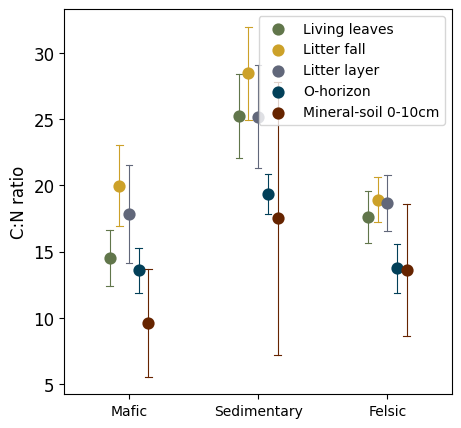

In [ ]:
#plot CN data old version
plt.figure(figsize=[5,5])
color_type={"Living leaves":"#61764B", "Litter fall":"#CCA129", "Litter layer":"#61677A", "O-horizon":"#024059",
           "Mineral-soil 0-10cm":"#662400"}
           #,"Mineral-soil 10-20cm":"#B33F00","Mineral-soil 20-30cm":"#FF6B1A"
sns.pointplot(x="region",y='CN',hue="type",errorbar="se", capsize=.05, linestyles="", dodge=0.3, hue_order=color_type,
errwidth=0.8,palette=color_type,data=all_cn_data)
plt.xlabel("")
plt.ylabel('C:N ratio',size=12)
plt.yticks(fontsize=12)
plt.legend(loc="upper right")

#plt.savefig('02_fig_tab/CN_figure.png', dpi=300);
plt.show()

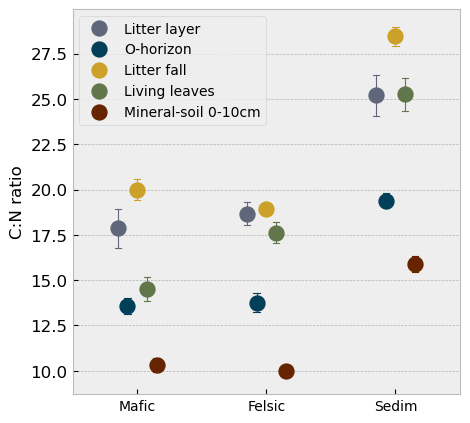

In [48]:
#plot CN data new version
plt.figure(figsize=[5,5])
all_cn_data=all_cn_data.replace({"region":{"Sedimentary":"Sedim"}})
color_type={"Living leaves":"#61764B", "Litter fall":"#CCA129", "Litter layer":"#61677A", "O-horizon":"#024059",
           "Mineral-soil 0-10cm":"#662400"}
geochem=["Mafic", "Felsic","Sedim"]
           #,"Mineral-soil 10-20cm":"#B33F00","Mineral-soil 20-30cm":"#FF6B1A"
sns.pointplot(x="region",y='CN',hue="type",errorbar="se", capsize=.05, linestyles="", dodge=0.3, order=geochem,
err_kws={'linewidth': 0.8},palette=color_type,data=all_cn_data)
plt.xlabel("")
plt.ylabel('C:N ratio',size=12)
plt.yticks(fontsize=12)
plt.legend(loc="upper left")

#plt.savefig('02_fig_tab/CN_figure.png', dpi=300);
plt.show()

In [214]:
all_CNPK_data.plotID.unique()

array(['KBPL10', 'KBPL11', 'KBPL12', 'KBPL6', 'NPL1', 'NPL10', 'NPL11',
       'NPL12', 'NPL2', 'NPL3', 'NPL4', 'NPL6', 'NPL7', 'NPL8', 'NPL9',
       'UPL1', 'UPL10', 'UPL11', 'UPL12', 'UPL2', 'UPL3', 'UPL4', 'UPL5',
       'UPL6', 'UPL7', 'UPL8', 'UPL9', 'KBPL1', 'KBPL2', 'KBPL3', 'KBPL4',
       'KBPL5', 'KBPL7', 'KBPL8', 'KBPL9', 'NPL5'], dtype=object)

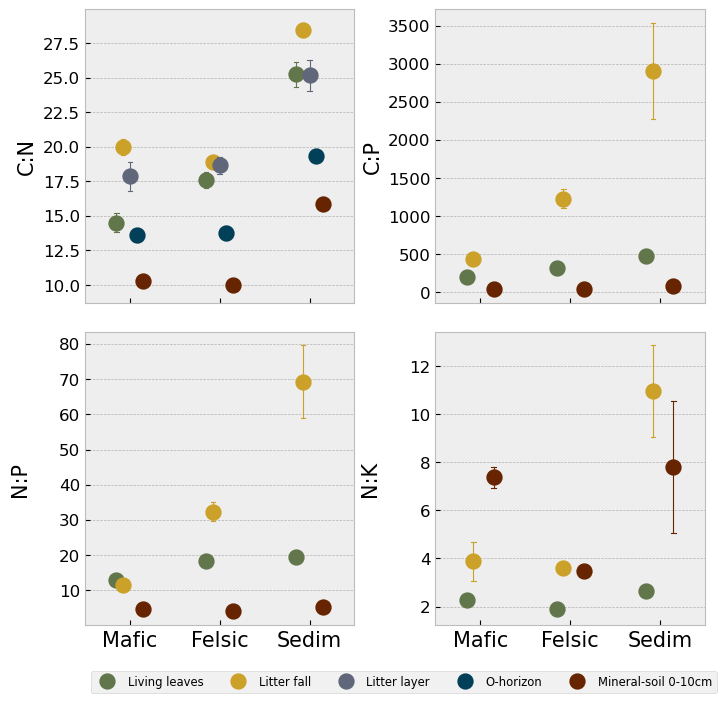

In [54]:
#plot CP data
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)
fig=plt.figure(figsize=[8,8])
plt.subplots_adjust(wspace=0.30, hspace=0.10)
# color_type={"Living leaves":"#61764B", "Litter fall":"#CCA129",
#            "Mineral-soil 0-10cm":"#662400"}
color_type={"Living leaves":"#61764B", "Litter fall":"#CCA129", "Litter layer":"#61677A", "O-horizon":"#024059",
           "Mineral-soil 0-10cm":"#662400"}
geochem=["Mafic", "Felsic","Sedim"]
plt.subplot(2,2,1)

sns.pointplot(x="region",y='CN',hue="type",errorbar="se", capsize=.05, linestyles="", dodge=0.3, order=geochem,
hue_order=color_type,err_kws={'linewidth': 0.8},palette=color_type,data=all_cn_data)
plt.xlabel("")
plt.ylabel('C:N',size=15)
plt.yticks(fontsize=12)
plt.xticks(fontsize=15)
plt.legend(loc="lower left",bbox_to_anchor=(0, -1.35), ncols=5, fontsize="small")
ax=plt.gca()
ax.axes.xaxis.set_ticklabels("")
# sns.pointplot(x="region",y='CN',hue="type",errorbar="se", capsize=.05, linestyles="", dodge=0.3, hue_order=color_type,
# errwidth=0.8,palette=color_type,data=all_CNPK_data)
# plt.xlabel("")
# plt.ylabel('C:N',size=12)
# plt.yticks(fontsize=12)
# plt.legend(loc="lower left",bbox_to_anchor=(0, 1), ncols=3)

plt.subplot(2,2,2)

sns.pointplot(x="region",y='CP',hue="type",errorbar="se", errwidth=0.8,capsize=.05, linestyles="", dodge=0.3, order=geochem,
hue_order=color_type,palette=color_type,data=all_CNPK_data)
plt.xlabel("")
plt.ylabel('C:P',size=15)
plt.yticks(fontsize=12)
plt.xticks(fontsize=15)
plt.legend('',frameon=False)
ax=plt.gca()
ax.axes.xaxis.set_ticklabels("")

plt.subplot(2,2,3)

sns.pointplot(x="region",y='NP',hue="type",errorbar="se", capsize=.05, linestyles="", 
              dodge=0.3, order=geochem,hue_order=color_type,errwidth=0.8,palette=color_type,data=all_CNPK_data)
plt.xlabel("")
plt.ylabel('N:P\n',size=15)
plt.yticks(fontsize=12)
plt.xticks(fontsize=15)
plt.legend('',frameon=False)

plt.subplot(2,2,4)

sns.pointplot(x="region",y='NK',hue="type",errorbar="se", capsize=.05, linestyles="", dodge=0.3, order=geochem,hue_order=color_type,
errwidth=0.8,palette=color_type,data=all_CNPK_data)
plt.xlabel("")
plt.ylabel('N:K\n',size=15)
plt.yticks(fontsize=12)
plt.xticks(fontsize=15)
plt.legend('',frameon=False)
fig.savefig('figures/Fig2.png', dpi=600,bbox_inches='tight', pad_inches=0.1);

In [ ]:
#unaggregated species data

species_chemistry=pd.read_excel("04_data/2_processed/species_chemistry.xlsx")
print(species_chemistry.shape)
troposoc_leaves_traits=pd.read_excel("04_data/1_original/troposoc_leaves_traits.xlsx")
print(troposoc_leaves_traits.shape)

(168, 18)
(160, 15)


In [ ]:
species_chemistry.head()

,region,plotID,slope,species,N,C,P,CN,NP,CP,K,Mg,Ca,Na,Fe,Al,Mn,Si
0,Mafic,KBPL1,PL,Agauria Salicifolia,2.660000,46.0200,1786.190000,17.300752,14.892033,257.643364,4807.34000,1771.470000,11244.820000,67.980000,692.040000,303.210000,2219.330000,1481.4400
1,Mafic,KBPL1,PL,Allophylus Kivuensis,3.943333,47.9400,3139.083333,12.313430,12.706809,156.592910,17073.68000,2945.293333,5447.906667,31.730000,929.850000,396.726667,715.380000,554.4200
2,Mafic,KBPL1,PL,Dombeya Goetzenii,3.470000,45.5850,2145.865000,13.135854,16.188717,212.758368,22514.74000,6304.520000,8476.435000,38.700000,884.345000,919.445000,3408.450000,450.3800
3,Mafic,KBPL1,PL,Neoboutonia Macrocalyx,3.952500,48.9825,2527.980000,12.418418,16.072216,198.931965,16350.50500,3750.422500,7883.910000,158.812500,422.297500,204.492500,129.802500,475.4725
4,Mafic,KBPL10,V,Alangium Chinense,3.203333,45.1700,2851.540000,14.121437,11.564732,162.513489,16844.20333,3539.433333,12543.713330,63.586667,153.323333,86.460000,33.093333,224.6000


In [ ]:
litter_fresh_df_agg.head()

,plotID,Ca_mg_kg_dry_weight,K_mg_kg_dry_weight,Mg_mg_kg_dry_weight,P_mg_kg_dry_weight,litter_C,litter_N,region,slope,N_mass,...,Ca,tracer,lit_N_adj,lit_K_adj,lit_P_adj,lit_Mg_adj,N_resorp,K_resorp,P_resorp,Mg_resorp
0,KBPL10,17.213000,8.920000,4.113000,2.233000,428.000000,22.000000,Mafic,V,33.857574,...,12.319769,1.397185,15.745943,6.384264,1.598213,2.943776,53.493589,62.703580,45.391308,20.371786
1,KBPL11,18.272905,7.237891,4.011445,1.622903,435.750000,18.250000,Mafic,V,28.049149,...,11.207066,1.630481,11.193018,4.439115,0.995352,2.460283,60.094982,71.368655,64.874511,21.740237
2,KBPL12,16.684012,3.713351,7.018714,1.946526,443.750000,19.500000,Mafic,V,25.471390,...,6.852107,2.434873,8.008630,1.525069,0.799436,2.882579,68.558330,86.094258,50.964346,4.151535
3,KBPL6,18.634068,4.807062,5.470394,1.727377,436.000000,25.333333,Mafic,UP,31.531142,...,9.281973,2.007555,12.619001,2.394486,0.860438,2.724904,59.979246,77.279978,60.199699,51.418205
4,NPL1,5.459219,0.782710,1.338704,0.187631,470.571429,17.285714,Sedimentary,PL,18.656642,...,6.263890,0.871538,19.833572,0.898079,0.215288,1.536024,-6.308370,87.566394,78.173771,30.021796


,plotID,Ca_mg_kg_dry_weight,K_mg_kg_dry_weight,Mg_mg_kg_dry_weight,P_mg_kg_dry_weight,litter_C,litter_N,region,slope,N_mass,...,tracer,lit_N_adj,lit_K_adj,lit_P_adj,lit_Mg_adj,N_resorp,K_resorp,P_resorp,Mg_resorp,NP_resorp
0,KBPL10,17.213000,8.920000,4.113000,2.233000,428.000000,22.000000,Mafic,V,33.857574,...,1.397185,15.745943,6.384264,1.598213,2.943776,53.493589,62.703580,45.391308,20.371786,1.178499
1,KBPL11,18.272905,7.237891,4.011445,1.622903,435.750000,18.250000,Mafic,V,28.049149,...,1.630481,11.193018,4.439115,0.995352,2.460283,60.094982,71.368655,64.874511,21.740237,0.926327
2,KBPL12,16.684012,3.713351,7.018714,1.946526,443.750000,19.500000,Mafic,V,25.471390,...,2.434873,8.008630,1.525069,0.799436,2.882579,68.558330,86.094258,50.964346,4.151535,1.345221
3,KBPL6,18.634068,4.807062,5.470394,1.727377,436.000000,25.333333,Mafic,UP,31.531142,...,2.007555,12.619001,2.394486,0.860438,2.724904,59.979246,77.279978,60.199699,51.418205,0.996338
4,NPL1,5.459219,0.782710,1.338704,0.187631,470.571429,17.285714,Sedimentary,PL,18.656642,...,0.871538,19.833572,0.898079,0.215288,1.536024,-6.308370,87.566394,78.173771,30.021796,-0.080697


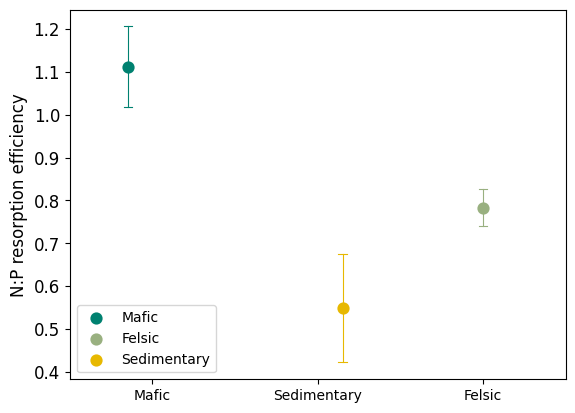

In [ ]:

colors={"Mafic":"#008170", "Felsic":"#99B080", "Sedimentary":"#E7B800"}

sns.pointplot(x="region",y='NP_resorp',hue="region",errorbar="se", capsize=.05, linestyles="", dodge=0.3,
errwidth=0.8,palette=colors,data=litter_fresh_df_agg,hue_order=colors)
plt.xlabel("")
plt.ylabel('N:P resorption efficiency',size=12)
plt.yticks(fontsize=12)
plt.legend(loc="lower left")


In [ ]:
#use the  wet chemiry data for top 10

resorp_species=species_chemistry.merge(litter_fresh_df_agg[["plotID","lit_N_adj","lit_K_adj","lit_P_adj","lit_Mg_adj"]], on="plotID", how="left")
resorp_species.tail()


In [ ]:
resorp_species["N_resorp"]=(resorp_species["N"]-resorp_species["lit_N_adj"])*100/resorp_species["N"]
resorp_species["P_resorp"]=(resorp_species["P"]-resorp_species["lit_P_adj"])*100/resorp_species["P"]
resorp_species["K_resorp"]=(resorp_species["K"]-resorp_species["lit_K_adj"])*100/resorp_species["K"]
resorp_species["NP_resorp"]=resorp_species["N_resorp"]/resorp_species["P_resorp"]

<Figure size 800x1200 with 0 Axes>

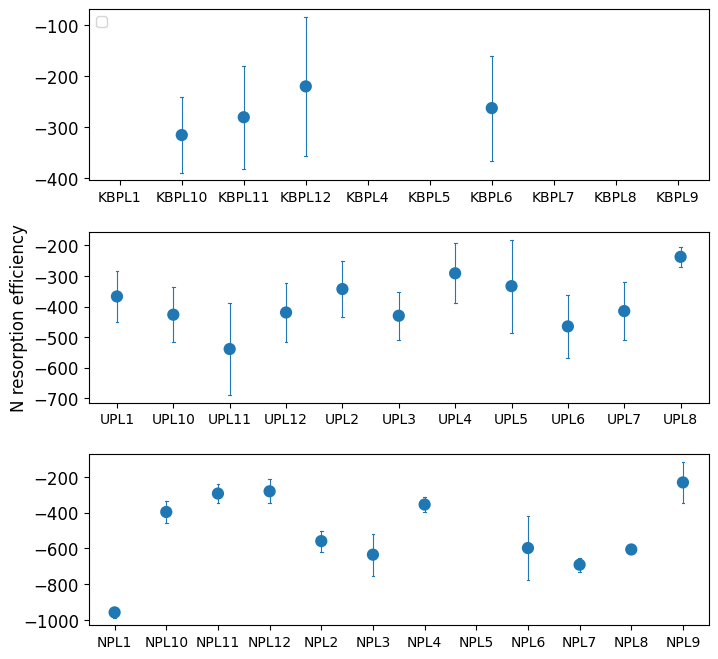

In [ ]:
#create point plots
plt.figure(figsize=[8,12])
#plt.style.use('bmh')

#plot CP data
colors={"PL":"#008170", "UP":"#99B080", "MS":"#E7B800","V":"#F99417"}
fig=plt.figure(figsize=[8,8])
plt.subplots_adjust(wspace=0.30, hspace=0.30)
plt.subplot(3,1,1)

sns.pointplot(x="plotID",y='N_resorp',errorbar="sd", capsize=.05, linestyles="", dodge=0.3,
errwidth=0.8,data=resorp_species.query('region=="Mafic"'))
plt.xlabel("")
plt.ylabel('',size=12)
plt.yticks(fontsize=12)
plt.legend(loc="upper left")

plt.subplot(3,1,2)

sns.pointplot(x="plotID",y='N_resorp',errorbar="sd", capsize=.05, linestyles="", dodge=0.3,
errwidth=0.8,data=resorp_species.query('region=="Felsic"'))
plt.xlabel("")
plt.ylabel('N resorption efficiency',size=12)
plt.yticks(fontsize=12)
plt.legend('',frameon=False)

plt.subplot(3,1,3)

sns.pointplot(x="plotID",y='N_resorp',errorbar="sd", capsize=.05, linestyles="", dodge=0.3,
errwidth=0.8,data=resorp_species.query('region=="Sedimentary"'))
plt.xlabel("")
plt.ylabel('',size=12)
plt.yticks(fontsize=12)
plt.legend('',frameon=False);

In [ ]:
traits_agg=traits_agg.replace({"region":{"Mixed":"Sedim"}})

In [ ]:
# look at the distributions

colors={"Mafic":"#00AFBB", "Felsic":"#E7B800", "Sedimentary":"#FC4E07"}
plt.hist(mafic_means, alpha = 0.5, color= "#00AFBB")
plt.hist(felsic_means, alpha = 0.5, color="#E7B800")
plt.hist(mixed_means, alpha = 0.5, color='#FC4E07')
plt.legend(colors)

plt.axvline(mafic, linewidth=2, color='b')
plt.axvline(felsic, linewidth=2,color='b')
plt.axvline(mixed, linewidth=2,color='b');

In [ ]:
#create a summary table grouped by regions and toipographic positions
summary=traits_agg.groupby(["region","slope"]).describe()
summary.to_excel("summary.xlsx")

#create a summary table grouped by regions only
summary_regions=traits_agg.groupby(['region']).describe()
summary_regions.to_excel("summary_regions.xlsx")

In [ ]:
#create a summary table OF soil properties grouped by regions only
soil_pro=pd.read_csv("sites_data.csv", delimiter=";")
summary_soil_prop=soil_pro.groupby(['region']).describe()
summary_soil_prop.to_excel("summary_soil_prop.xlsx")


In [15]:
traits_agg.head()

,plotID,region,slope,N_mass,C_mass,P,CN,NP,CP,K,Mg,Ca,Na,Fe,Al,Mn
0,KBPL1,Mafic,PL,30.000254,464.316393,2.028663,15.477082,14.788192,228.878067,9.145580,2.615660,10.056992,0.070924,0.710749,0.375557,1.999654
1,KBPL10,Mafic,V,33.857574,455.139414,2.926664,13.442765,11.568656,155.514723,17.117632,3.696900,12.319769,0.063301,0.154928,0.089024,0.042561
2,KBPL11,Mafic,V,28.049149,462.611250,2.833704,16.492880,9.898405,163.253211,15.504388,3.143740,11.207066,0.038320,0.213851,0.213814,0.084195
3,KBPL12,Mafic,V,25.471390,484.933781,1.630316,19.038372,15.623589,297.447695,10.967192,3.007433,6.852107,0.036358,0.193373,0.182028,0.542729
4,KBPL4,Mafic,UP,30.970188,468.624280,1.779991,15.131464,17.399067,263.273344,12.740349,3.418260,5.555784,0.032779,0.484450,0.329576,1.589682


In [ ]:
from itertools import groupby
traits_agg.iloc[:,0:13].groupby("region").describe().transpose()

region           Felsic      Mafic  Sedimentary
N_mass count  12.000000  10.000000    12.000000
       mean   26.718397  32.524280    19.593255
       std     3.080415   4.027108     1.870949
       min    21.647725  25.471390    16.238767
       25%    24.658371  30.242737    18.332923
...                 ...        ...          ...
Na     min     0.057920   0.032779     0.019588
       25%     0.082960   0.036849     0.020514
       50%     0.103304   0.043918     0.025007
       75%     0.139991   0.064742     0.030643
       max     0.236128   0.073045     0.049872

[80 rows x 3 columns]

In [ ]:
df=pd.read_csv('traits_all.csv', delimiter=';',encoding='ISO-8859-1')

df.head()

,region,plotID,slope,treeID,Species,N,C,CN,N_mass,C_mass,...,Ca,Na,Fe,Al,Mn,Si,BA,meanWD,predHeight18,DBH18
0,Mafic,KBPL1,PL,1008,Neoboutonia Macrocalyx,4.15,50.18,12.091566,41500,501800,...,8703.87,213.01,75.94,40.75,61.13,407.50,0.373977,0.3300,15.179520,27.6
1,Mafic,KBPL1,PL,1015,Neoboutonia Macrocalyx,3.90,47.73,12.238462,39000,477300,...,6360.60,147.60,818.29,316.26,142.96,498.60,0.224830,0.3300,13.182123,21.4
2,Mafic,KBPL1,PL,1017,Neoboutonia Macrocalyx,3.61,47.84,13.252078,36100,478400,...,7767.30,61.63,719.02,420.21,253.99,588.29,0.376691,0.3300,15.208282,27.7
3,Mafic,KBPL1,PL,1023,Allophylus Kivuensis,3.75,48.13,12.834667,37500,481300,...,5698.03,29.85,848.92,466.44,722.05,615.70,0.393187,0.5178,15.378831,28.3
4,Mafic,KBPL1,PL,1024,Allophylus Kivuensis,4.52,46.49,10.285398,45200,464900,...,5899.93,37.83,1034.71,389.67,875.82,552.35,0.077941,0.5178,9.347007,12.6


In [ ]:
#merge soils data and canopy chemistry to have complete dataset
geochem=pd.read_csv('04_data/3_analysed/soils_data.csv', delimiter=";")

rpcs=pd.read_csv('04_data/3_analysed/rpc_score_data.csv', delimiter=";")
dt=pd.merge(traits_agg,geochem, on="plotID", how="inner")
main_dat=pd.merge(dt, rpcs,on="plotID", how="inner" )
main_dat.head()


,plotID,region_x,slope_x,N_mass,C_mass,P,CN,NP,CP,K,...,K_soil,Mg_soil,Na_soil,TRB_soil,P_soil,region,slope,RC1,RC2,RC3
0,KBPL1,Mafic,PL,30.000254,464.316393,2.028663,15.477082,14.788192,228.878067,9.145580,...,0.067103,0.194337,0.019747,0.354697,0.135288,Mafic,PL,-7.126028,1.757190,2.343111
1,KBPL10,Mafic,V,33.857574,455.139414,2.926664,13.442765,11.568656,155.514723,17.117632,...,0.157863,0.415023,0.043583,0.999533,0.212197,Mafic,V,21.107852,6.519252,2.103002
2,KBPL11,Mafic,V,28.049149,462.611250,2.833704,16.492880,9.898405,163.253211,15.504388,...,0.158810,0.473423,0.025700,0.972210,0.372384,Mafic,V,9.081921,11.271054,-1.079810
3,KBPL12,Mafic,V,25.471390,484.933781,1.630316,19.038372,15.623589,297.447695,10.967192,...,0.102143,0.305857,0.013650,0.571347,0.252917,Mafic,V,-3.557785,7.953501,-1.480712
4,KBPL4,Mafic,UP,30.970188,468.624280,1.779991,15.131464,17.399067,263.273344,12.740349,...,0.058960,0.181430,0.018250,0.294893,0.137902,Mafic,UP,-10.466213,3.102760,1.997209


In [ ]:
main_dat.info()

In [ ]:
#main_dat.to_csv("main_data.csv")

In [ ]:
#read the main dataset for correlatio analysis
main_dat=pd.read_csv("04_data/3_analysed/main_data_topo.csv", delimiter=",")
main_dat.info()

In [ ]:
#create a correlation matrix
correlations=main_dat.iloc[:,3:].corr(method="pearson")
correlations.to_csv("correlations.csv")
correlations

In [ ]:
# @title
#create a correlation matrix
correlations=main_dat.iloc[:,3:].corr(method="spearman")
correlations.to_csv("correlations_spearman.csv")
correlations

,N_canopy,C_canopy,P_canopy,CN,CP_canopy,NP_canopy,K_canopy,Mg_canopy,Ca_canopy,Na_canopy,...,silt,sand,TPI,TWI,LS_factor,CTI,SPI,aspect,curvature,slope_per
N_canopy,1.000000,-0.488159,0.795875,-0.960886,-0.811765,-0.416960,0.680367,0.750344,0.515050,0.444461,...,-0.286784,-0.213140,0.139190,-0.295340,0.382235,-0.069824,0.236364,-0.451184,0.078380,0.539801
C_canopy,-0.488159,1.000000,-0.497937,0.633613,0.602750,0.358289,-0.478992,-0.439878,-0.525745,-0.499771,...,0.011459,0.183804,0.085409,-0.120856,-0.353080,-0.191749,-0.332926,0.254698,0.069824,-0.307869
P_canopy,0.795875,-0.497937,1.000000,-0.761345,-0.959969,-0.834377,0.794347,0.752483,0.461268,0.398625,...,-0.352788,-0.135829,0.212834,-0.347594,0.172627,-0.230252,0.008403,-0.302368,0.141635,0.350649
CN,-0.960886,0.633613,-0.761345,1.000000,0.817571,0.410542,-0.659282,-0.732620,-0.549580,-0.461574,...,0.296257,0.217723,-0.158442,0.296868,-0.415686,0.067074,-0.266310,0.510466,-0.097937,-0.591444
CP_canopy,-0.811765,0.602750,-0.959969,0.817571,1.000000,0.817876,-0.768373,-0.715508,-0.465241,-0.379068,...,0.379068,0.135523,-0.260810,0.384263,-0.191961,0.242781,-0.027349,0.353705,-0.224752,-0.410848
NP_canopy,-0.416960,0.358289,-0.834377,0.410542,0.817876,1.000000,-0.586249,-0.512299,-0.262338,-0.176776,...,0.382429,-0.093048,-0.244003,0.319481,0.100200,0.291979,0.233308,0.132468,-0.222307,-0.071658
K_canopy,0.680367,-0.478992,0.794347,-0.659282,-0.768373,-0.586249,1.000000,0.616807,0.553247,0.567609,...,-0.195722,-0.301757,0.129412,-0.251642,0.312570,-0.155080,0.164859,-0.283117,0.117494,0.358594
Mg_canopy,0.750344,-0.439878,0.752483,-0.732620,-0.715508,-0.512299,0.616807,1.000000,0.537357,0.353400,...,-0.311536,-0.081131,0.065546,-0.082047,0.349397,0.067991,0.256837,-0.216501,0.006264,0.356150
Ca_canopy,0.515050,-0.525745,0.461268,-0.549580,-0.465241,-0.262338,0.553247,0.537357,1.000000,0.831322,...,0.205500,-0.418487,-0.082353,0.112605,0.249350,0.093048,0.217723,-0.029794,-0.077769,0.130023
Na_canopy,0.444461,-0.499771,0.398625,-0.461574,-0.379068,-0.176776,0.567609,0.353400,0.831322,1.000000,...,0.163331,-0.602445,-0.098549,0.038655,0.195644,0.026127,0.162414,-0.095187,-0.108633,0.104354


In [59]:
#import data for correlation matrix
df=pd.read_csv("correlations_topo.csv", delimiter=",")
df=df.set_index("variable")
#df=df.transpose()
df


,pH_KCL,ECEC,Bio-P,Ca_ex,K_ex,Mg_ex,total_N,total_P,total_K,total_Ca,total_Mg,total_Na
variable,,,,,,,,,,,,
N,NaN,0.5,NaN,0.4,0.5,0.6,0.4,0.4,0.4,0.4,0.6,0.7
P,NaN,0.5,NaN,0.4,0.5,0.6,0.5,0.6,0.4,0.4,0.6,0.7
K,0.5,0.5,0.4,0.5,0.5,0.6,NaN,NaN,0.4,0.5,0.5,0.6
Ca,0.9,0.8,0.6,0.9,0.9,0.9,NaN,NaN,0.8,0.9,0.7,0.4
Mg,NaN,0.4,NaN,0.3,0.4,0.5,0.3,0.4,NaN,NaN,0.5,0.8
Na,0.8,0.7,NaN,0.8,0.7,0.7,NaN,NaN,0.7,0.7,0.4,NaN


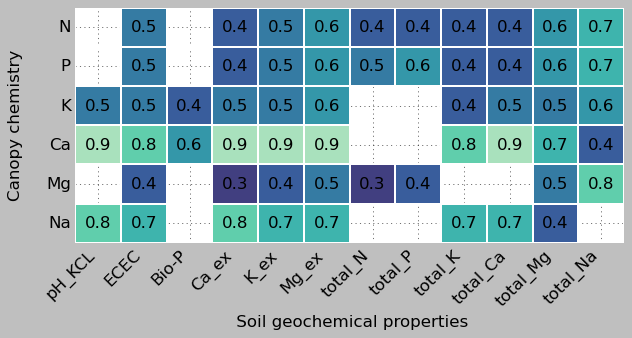

In [120]:
#create the figure
plt.style.use("_mpl-gallery")
fig= plt.figure(figsize=[7,3])
ax=sns.heatmap(df, annot=True,cmap="mako",fmt='.1f', annot_kws={"size": 15, "color":"black"},
vmin=0, vmax=1,cbar=False, linewidths=0.1, linecolor='white', 
robust=True, cbar_kws={'spacing':'uniform'})


# set the x-labels with
_, xlabels = plt.xticks()
_, ylabels = plt.yticks()
ax.set_xticklabels(xlabels,size=15,rotation=45, ha="right")
ax.set_yticklabels(ylabels,size=15,rotation=0, ha="right")

plt.ylabel("Canopy chemistry\n ", fontsize=15)
plt.xlabel(" Soil geochemical properties",fontsize=15)
plt.show();
fig.savefig('figures/Fig-A1.png', dpi=600,bbox_inches='tight', pad_inches=0.05);

In [ ]:
from random import randint


fig, ax = plt.subplots()

data = np.clip(randint(250, 250), -1, 1)

cax = ax.imshow(data, cmap=cm.afmhot)
ax.set_title('Gaussian noise with horizontal colorbar')

cbar = fig.colorbar(cax, ticks=[-1, 0, 1], orientation='horizontal')
cbar.ax.set_xticklabels(['Low', 'Medium', 'High'])  # horizontal colorbar

plt.show()

In [ ]:
canopy=pd.read_csv("heat_map_canopy.csv", delimiter=";")
canopy=canopy.set_index("variable")
canopy



,C_canopy,N_canopy,P_canopy,C:N_canopy,C:P_canopy,N:P_canopy,Ca_canopy,K_canopy,Mg_canopy,Na_canopy
variable,,,,,,,,,,
C_canopy,1.0,-0.4,-0.4,0.6,0.7,0.4,-0.5,-0.4,NaN,NaN
N_canopy,-0.4,1.0,0.8,-0.9,-0.8,-0.4,0.4,0.7,0.7,NaN
P_canopy,-0.4,0.8,1.0,-0.7,-0.9,-0.8,0.4,0.8,0.8,NaN
C:N_canopy,0.6,-0.9,-0.7,1.0,0.8,NaN,-0.5,-0.7,-0.7,NaN
C:P_canopy,0.7,-0.8,-0.9,0.8,1.0,0.8,-0.5,-0.8,-0.7,NaN
N:P_canopy,0.4,-0.4,-0.8,NaN,0.8,1.0,NaN,-0.6,-0.5,NaN
Ca_canopy,-0.5,0.4,0.4,-0.5,-0.5,NaN,1.0,0.5,0.4,0.7
K_canopy,-0.4,0.7,0.8,-0.7,-0.8,-0.6,0.5,1.0,0.6,NaN
Mg_canopy,NaN,0.7,0.8,-0.7,-0.7,-0.5,0.4,0.6,1.0,NaN


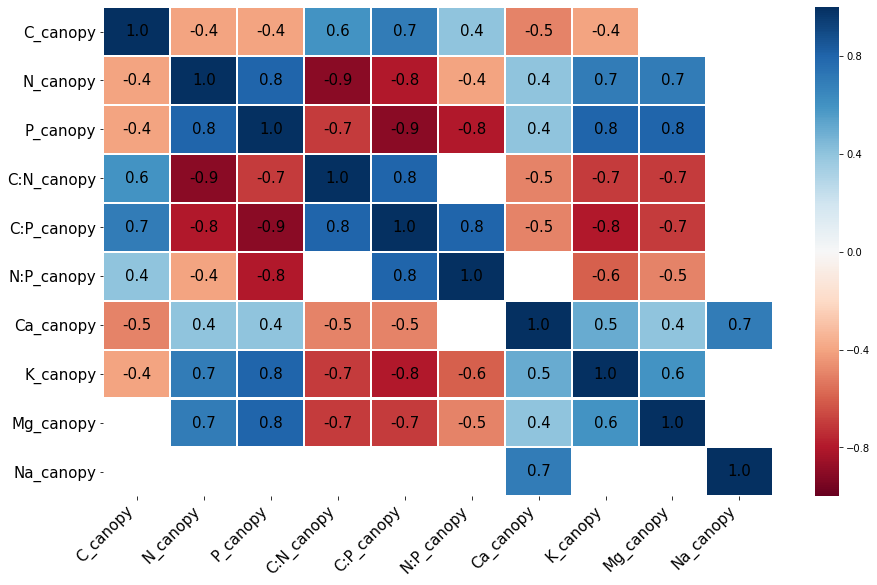

In [ ]:
plt.figure(figsize=[15,9])

p=sns.heatmap(canopy, annot=True,cmap="RdBu",fmt='.1f',center=0.0, annot_kws={"size": 15, "color":"black"},
vmin=-1, vmax=1,cbar=True, linewidths=1.1, linecolor='white')
# set the labels with
_, xlabels = plt.xticks()
_, ylabels = plt.yticks()
p.set_yticklabels(ylabels, size=15)
p.set_xticklabels(xlabels,size=15,rotation=45, ha="right")
plt.ylabel("")
plt.savefig('heat_canopy.png', pdi=300);


In [ ]:
#read the effect size data
effect_size=pd.read_csv('04_data/3_analysed/PCA_effect_size.csv', delimiter=',')
effect_size

,factor,N,P,CN,NP,CP,K,Mg,Ca,Na
0,pH & Base cation,0.09,0.14,-0.09,-0.03,-54.59,2434.27,268.14,2917.31,40.07
1,pH & Base cation,0.04,0.06,-0.15,-0.01,-88.78,1012.10,-4.30,2373.12,28.78
2,pH & Base cation,0.14,0.23,-0.04,0.04,-20.39,3856.43,540.58,3461.50,51.35
3,CNP,0.08,0.15,-0.08,-0.10,-57.22,321.33,255.33,51.33,-13.67
4,CNP,0.02,0.06,-0.14,-0.18,-93.11,-1171.10,-30.57,-519.74,-25.52
5,CNP,0.13,0.24,-0.02,-0.03,-21.34,1813.76,541.23,622.40,-1.82
6,Texture,0.11,0.20,-0.12,-0.09,-66.30,2172.98,549.80,-49.78,-3.68
7,Texture,0.05,0.11,-0.18,-0.16,-102.10,683.88,264.54,-619.58,-15.50
8,Texture,0.16,0.29,-0.06,-0.02,-30.49,3662.09,835.06,520.02,8.13


In [ ]:
#merge resoption data and geochemical data
resorp_df=litter_fresh_df_agg[["plotID","region","K_resorp","P_resorp","Mg_resorp"]]
resorp_df.head()

,plotID,region,K_resorp,P_resorp,Mg_resorp
0,KBPL10,Mafic,62.703580,45.391308,20.371786
1,KBPL11,Mafic,71.368655,64.874511,21.740237
2,KBPL12,Mafic,86.094258,50.964346,4.151535
3,KBPL6,Mafic,77.279978,60.199699,51.418205
4,NPL1,Sedimentary,87.566394,78.173771,30.021796


In [ ]:
main_dat.info()

In [ ]:
#look at geochemical data
soils_col=["plotID","region","CN_soil","NP_soil","P_avail","P_g_kg","CP_soil","CEC","bases_in_CEC","ECEC","bases_in_ECEC","exch_bases_Mg","exch_bases_Ca",
           "exch_bases_K","exch_base","pH_KCL","Ca_soil","K_soil","Mg_soil","TRB_soil","clay","silt","sand"]

soil_geo=main_dat[soils_col]
print(soil_geo.shape)
soil_geo.head()

(34, 23)


,plotID,region,CN_soil,NP_soil,P_avail,P_g_kg,CP_soil,CEC,bases_in_CEC,ECEC,...,exch_bases_K,exch_base,pH_KCL,Ca_soil,K_soil,Mg_soil,TRB_soil,clay,silt,sand
0,KBPL1,Mafic,10.581869,2.562455,0.000000,1.352882,27.115566,31.770823,9.834950,9.394980,...,0.203017,3.884067,3.705613,0.073510,0.067103,0.194337,0.354697,54.224413,31.471890,12.620437
1,KBPL10,Mafic,9.068644,2.462586,41.629383,2.121970,22.332316,36.676987,60.952607,22.085407,...,0.616953,19.404393,5.298873,0.383063,0.157863,0.415023,0.999533,48.142433,37.862387,13.729543
2,KBPL11,Mafic,10.521983,1.651541,54.279213,3.723836,17.377485,48.740317,10.051393,13.564130,...,0.411780,9.760087,4.154737,0.314277,0.158810,0.473423,0.972210,25.154927,58.444510,18.083197
3,KBPL12,Mafic,11.422400,2.253853,35.966137,2.529166,25.744404,43.953367,0.473767,10.872967,...,0.258440,4.675587,3.490830,0.149697,0.102143,0.305857,0.571347,28.836737,55.569603,18.218593
4,KBPL4,Mafic,11.102909,2.994539,0.000000,1.379022,33.248091,35.031427,1.172953,8.608213,...,0.161850,2.270470,3.437530,0.036253,0.058960,0.181430,0.294893,53.652933,33.695573,12.724773


In [ ]:
# #rename plotID in litter CN data
# resorp_df=resorp_df.replace({"plotID":{"KBPL13":"KBPL5","KBPL14":"KBPL1",
#                                        "KBPL15":"KBPL8","KBPL16":"KBPL9"}})

# print(soil_geo.plotID.unique())
# print(resorp_df.plotID.unique())

['KBPL1' 'KBPL10' 'KBPL11' 'KBPL12' 'KBPL4' 'KBPL5' 'KBPL6' 'KBPL7'
 'KBPL8' 'KBPL9' 'UPL1' 'UPL10' 'UPL11' 'UPL12' 'UPL2' 'UPL3' 'UPL4'
 'UPL5' 'UPL6' 'UPL7' 'UPL8' 'UPL9' 'NPL1' 'NPL10' 'NPL11' 'NPL12' 'NPL2'
 'NPL3' 'NPL4' 'NPL5' 'NPL6' 'NPL7' 'NPL8' 'NPL9']
['KBPL10' 'KBPL11' 'KBPL12' 'KBPL6' 'NPL1' 'NPL10' 'NPL11' 'NPL12' 'NPL2'
 'NPL3' 'NPL4' 'NPL6' 'NPL7' 'NPL8' 'NPL9' 'UPL1' 'UPL10' 'UPL11' 'UPL12'
 'UPL2' 'UPL3' 'UPL4' 'UPL5' 'UPL6' 'UPL7' 'UPL8' 'UPL9']


In [ ]:
resorp_df.head()

,plotID,region,K_resorp,P_resorp,Mg_resorp
0,KBPL10,Mafic,62.703580,45.391308,20.371786
1,KBPL11,Mafic,71.368655,64.874511,21.740237
2,KBPL12,Mafic,86.094258,50.964346,4.151535
3,KBPL6,Mafic,77.279978,60.199699,51.418205
4,NPL1,Sedimentary,87.566394,78.173771,30.021796


In [ ]:
resorp_soil=soil_geo.merge(resorp_df,on=["plotID"], how="inner")
resorp_soil=resorp_soil.drop(columns=["region_x","region_y"])
print(resorp_soil.shape)
print(resorp_soil.plotID.unique())
resorp_soil.head()

(27, 25)
['KBPL10' 'KBPL11' 'KBPL12' 'KBPL6' 'UPL1' 'UPL10' 'UPL11' 'UPL12' 'UPL2'
 'UPL3' 'UPL4' 'UPL5' 'UPL6' 'UPL7' 'UPL8' 'UPL9' 'NPL1' 'NPL10' 'NPL11'
 'NPL12' 'NPL2' 'NPL3' 'NPL4' 'NPL6' 'NPL7' 'NPL8' 'NPL9']


,plotID,CN_soil,NP_soil,P_avail,P_g_kg,CP_soil,CEC,bases_in_CEC,ECEC,bases_in_ECEC,...,Ca_soil,K_soil,Mg_soil,TRB_soil,clay,silt,sand,K_resorp,P_resorp,Mg_resorp
0,KBPL10,9.068644,2.462586,41.629383,2.121970,22.332316,36.676987,60.952607,22.085407,97.236297,...,0.383063,0.157863,0.415023,0.999533,48.142433,37.862387,13.729543,62.703580,45.391308,20.371786
1,KBPL11,10.521983,1.651541,54.279213,3.723836,17.377485,48.740317,10.051393,13.564130,57.645343,...,0.314277,0.158810,0.473423,0.972210,25.154927,58.444510,18.083197,71.368655,64.874511,21.740237
2,KBPL12,11.422400,2.253853,35.966137,2.529166,25.744404,43.953367,0.473767,10.872967,32.574653,...,0.149697,0.102143,0.305857,0.571347,28.836737,55.569603,18.218593,86.094258,50.964346,4.151535
3,KBPL6,9.394063,2.260706,20.380027,1.925181,21.237211,33.489923,42.258943,16.193273,72.928197,...,0.282973,0.133473,0.346460,0.799360,47.369543,35.611007,14.092243,77.279978,60.199699,51.418205
4,UPL1,9.710759,9.285421,29.546290,0.324419,90.168481,18.208220,84.285507,18.361410,93.052103,...,0.277843,0.118700,0.231177,0.647517,44.268613,51.323850,6.838393,83.970588,76.513001,30.229807


In [ ]:
resorp_soil.info()

In [ ]:
corr=round(resorp_soil.corr(), 1)
corr_subset=corr.loc[["K_resorp","P_resorp","Mg_resorp"], ["P_avail","exch_bases_Ca",
           "exch_bases_K","exch_base","pH_KCL","Ca_soil","K_soil","Mg_soil","TRB_soil"]]
corr_subset

<ipython-input-101-14551e80888a>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=round(resorp_soil.corr(), 1)


,P_avail,exch_bases_Ca,exch_bases_K,exch_base,pH_KCL,Ca_soil,K_soil,Mg_soil,TRB_soil
K_resorp,-0.3,-0.4,-0.4,-0.4,-0.3,-0.5,-0.4,-0.4,-0.4
P_resorp,-0.5,-0.4,-0.5,-0.4,-0.3,-0.5,-0.4,-0.5,-0.5
Mg_resorp,-0.5,-0.3,-0.4,-0.3,-0.3,-0.4,-0.4,-0.5,-0.5


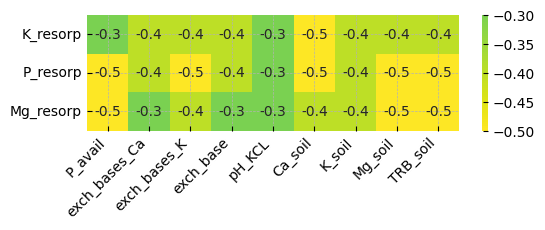

In [ ]:
plt.figure(figsize=[6,1.5])
sns.heatmap(corr_subset, annot=True,cmap='viridis_r',fmt='.1f',
           cbar=True,center=0)
plt.xticks(rotation=45, ha="right")
#plt.savefig('02_fig_tab/resorp_corr.png', dpi=300)
plt.show()

In [ ]:
biomass_data=pd.read_csv('04_data/3_analysed/biomass_data_complete.csv', delimiter=';')
biomass_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 51 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   region             32 non-null     object 
 1   slope              32 non-null     object 
 2   plot_id            32 non-null     object 
 3   plotID             32 non-null     object 
 4   CWM_N              32 non-null     float64
 5   CWM_CN             32 non-null     float64
 6   RGR                32 non-null     float64
 7   wd                 32 non-null     float64
 8   ACW_Cstock         32 non-null     float64
 9   L_O_Cstock         32 non-null     float64
 10  Root_Cstock        32 non-null     float64
 11  NPProot            32 non-null     float64
 12  NPPLitter          32 non-null     float64
 13  NPPACW             32 non-null     float64
 14  totalNPP           32 non-null     float64
 15  root_allocation    32 non-null     float64
 16  root_allocation.1  32 non-nu

In [ ]:
biomass_resorp=biomass_data[["plotID","RGR","wd","ACW_Cstock","L_O_Cstock","Root_Cstock","NPProot",
                             "NPPLitter","NPPACW","dbh","Tree_height"]].merge(resorp_df,on=["plotID"], how="inner")
biomass_resorp.head()

In [ ]:
#load litter fall CN data
wb= gc.open('fine_roots').sheet1

# get_all_values gives a list of rows.
roots = wb.get_all_values()

#Convert to a DataFrame and render
fine_root=pd.DataFrame.from_records(roots, columns=["plotID","layer","production"])
fine_roots=fine_root.drop(index=0)
fine_roots["production"]=fine_roots["production"].astype(float)
fine_roots.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160 entries, 1 to 160
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   plotID      160 non-null    object 
 1   layer       160 non-null    object 
 2   production  160 non-null    float64
dtypes: float64(1), object(2)
memory usage: 3.9+ KB


In [ ]:
fine_roots

,plotID,layer,production
1,KBPL10,1,0.040475
2,KBPL10,2,0.165059
3,KBPL10,3,0.039747
4,KBPL10,4,0.030523
5,KBPL10,O,0.188761
...,...,...,...
156,UPL9,1,0.671408
157,UPL9,2,0.291492
158,UPL9,3,0.398206
159,UPL9,4,0.477360


In [ ]:
# Calculate the sum of coverage for each plotID layer
total_roots = fine_roots.groupby('plotID')['production'].transform(sum)
# Create a new column proportion
fine_roots['proportion'] = fine_roots['production']*100/total_roots
fine_roots.head()



,plotID,layer,production,proportion
1,KBPL10,1,0.040475,8.712546
2,KBPL10,2,0.165059,35.529739
3,KBPL10,3,0.039747,8.555802
4,KBPL10,4,0.030523,6.570266
5,KBPL10,O,0.188761,40.631647


In [ ]:
fine_roots.tail()

,plotID,layer,production,proportion
156,UPL9,1,0.671408,36.519983
157,UPL9,2,0.291492,15.855189
158,UPL9,3,0.398206,21.659705
159,UPL9,4,0.477360,25.965123
160,UPL9,O,0.000000,0.000000


In [ ]:
fine_roots_pivot=pd.pivot_table(fine_roots,index="plotID", columns="layer", values="proportion").reset_index()
fine_roots_pivot=fine_roots_pivot.rename(columns={"1":"roots_0-10cm","2":"roots 10-20cm","3":"roots 20-30cm",
                                                  "4":"roots 30-50cm", "O":"O-horizon"})
fine_roots_pivot.head()



layer,plotID,roots_0-10cm,roots 10-20cm,roots 20-30cm,roots 30-50cm,O-horizon
0,KBPL10,8.712546,35.529739,8.555802,6.570266,40.631647
1,KBPL11,3.715469,10.968974,2.570883,5.403165,77.341509
2,KBPL12,13.731822,9.531653,4.497085,5.126193,67.113248
3,KBPL13,29.332619,4.534977,5.593139,6.802466,53.736800
4,KBPL14,11.480891,1.742882,3.491651,0.788152,82.496424


In [ ]:
litter_fresh_df_agg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   plotID               27 non-null     object 
 1   Ca_mg_kg_dry_weight  27 non-null     float64
 2   K_mg_kg_dry_weight   27 non-null     float64
 3   Mg_mg_kg_dry_weight  27 non-null     float64
 4   P_mg_kg_dry_weight   27 non-null     float64
 5   litter_C             27 non-null     float64
 6   litter_N             27 non-null     float64
 7   region               27 non-null     object 
 8   slope                27 non-null     object 
 9   N_mass               27 non-null     float64
 10  C_mass               27 non-null     float64
 11  P                    27 non-null     float64
 12  K                    27 non-null     float64
 13  CN                   27 non-null     float64
 14  NP                   27 non-null     float64
 15  Mg                   27 non-null     float

In [ ]:
#merge resoption data and geochemical data
resorp_df=litter_fresh_df_agg[["plotID","N_resorp","region","K_resorp","P_resorp","Mg_resorp","NP_resorp"]]
resorp_df.head()

,plotID,N_resorp,region,K_resorp,P_resorp,Mg_resorp,NP_resorp
0,KBPL10,53.493589,Mafic,62.703580,45.391308,20.371786,1.178499
1,KBPL11,60.094982,Mafic,71.368655,64.874511,21.740237,0.926327
2,KBPL12,68.558330,Mafic,86.094258,50.964346,4.151535,1.345221
3,KBPL6,59.979246,Mafic,77.279978,60.199699,51.418205,0.996338
4,NPL1,-6.308370,Sedimentary,87.566394,78.173771,30.021796,-0.080697


In [ ]:
resorp_df

,plotID,N_resorp,region,K_resorp,P_resorp,Mg_resorp,NP_resorp
0,KBPL10,53.493589,Mafic,62.703580,45.391308,20.371786,1.178499
1,KBPL11,60.094982,Mafic,71.368655,64.874511,21.740237,0.926327
2,KBPL12,68.558330,Mafic,86.094258,50.964346,4.151535,1.345221
3,KBPL6,59.979246,Mafic,77.279978,60.199699,51.418205,0.996338
4,NPL1,-6.308370,Sedimentary,87.566394,78.173771,30.021796,-0.080697
5,NPL10,51.996127,Sedimentary,78.750055,78.424367,39.404383,0.663010
6,NPL11,63.570699,Sedimentary,85.694833,76.227639,40.205233,0.833959
7,NPL12,59.524086,Sedimentary,66.970359,37.930239,37.696915,1.569304
8,NPL2,34.628587,Sedimentary,85.397760,79.728067,37.003199,0.434334
9,NPL3,24.266334,Sedimentary,92.972171,85.488305,39.378337,0.283856


In [ ]:
# fine_roots_pivot=fine_roots_pivot.iloc[8:,:]
# fine_roots_pivot

In [ ]:
resorp_root_density=fine_roots_pivot.merge(resorp_df[["plotID","N_resorp","K_resorp",	"P_resorp","Mg_resorp","NP_resorp"]],on=["plotID"], how="inner")
resorp_root_density

In [ ]:
corr2=round(biomass_resorp.iloc[:,1:].corr(), 1)
corr_subset2=corr2.loc[["K_resorp","P_resorp","Mg_resorp"], ["RGR","wd",
           "ACW_Cstock","L_O_Cstock","Root_Cstock","Tree_height"]]
corr_subset2

In [ ]:

sns.heatmap(corr_subset2, annot=True,cmap='viridis_r',fmt='.1f',
           cbar=True,center=0)
plt.xticks(rotation=45, ha="right")

#plt.savefig('02_fig_tab/resorp_biomass_corr.png', dpi=300)
plt.show();

<ipython-input-151-dc4ea6a910b5>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,1,1)


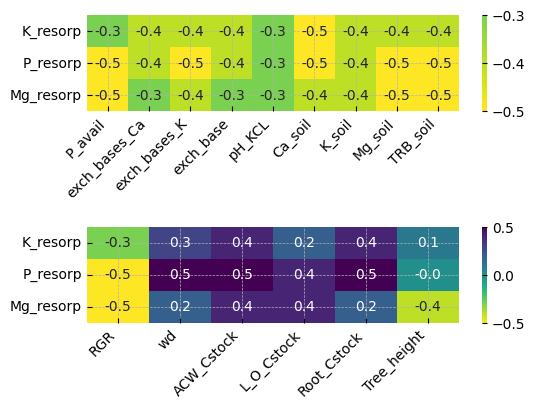

In [ ]:
fig = plt.subplots(figsize=(6,4))
plt.subplots_adjust(hspace=1.2)

plt.subplot(2,1,1)
sns.heatmap(corr_subset, annot=True,cmap='viridis_r',fmt='.1f',
           cbar=True,center=0)
plt.xticks(rotation=45, ha="right")


plt.subplot(2,1,2)

sns.heatmap(corr_subset2, annot=True,cmap='viridis_r',fmt='.1f',
           cbar=True,center=0)
plt.xticks(rotation=45, ha="right")

#plt.savefig('02_fig_tab/resorp_biomass_corr.png', dpi=300)
plt.show();

<ipython-input-55-76606b3cd75e>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr3=np.round(resorp_root_density.corr(),1)


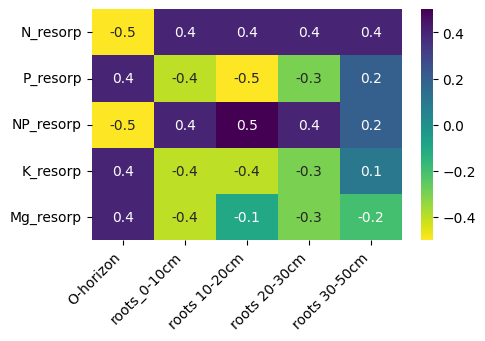

In [ ]:
corr3=np.round(resorp_root_density.corr(),1)
corr_subset3=corr3.loc[["N_resorp","P_resorp","NP_resorp","K_resorp","Mg_resorp"], ["O-horizon","roots_0-10cm","roots 10-20cm","roots 20-30cm","roots 30-50cm"]]
corr_subset3

fig = plt.subplots(figsize=(5,3))
sns.heatmap(corr_subset3, annot=True,cmap='viridis_r',fmt='.1f',
           cbar=True,center=0)
plt.xticks(rotation=45, ha="right");

In [ ]:
rpc_data=pd.read_csv('04_data/3_analysed/rpc_score_data.csv', delimiter=';')
rpc_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   plotID  34 non-null     object 
 1   region  34 non-null     object 
 2   slope   34 non-null     object 
 3   RC1     34 non-null     float64
 4   RC2     34 non-null     float64
 5   RC3     34 non-null     float64
dtypes: float64(3), object(3)
memory usage: 1.7+ KB


In [ ]:
resorp_rpc=rpc_data.merge(resorp_df,on=["plotID"], how="inner")
resorp_rpc.head()

,plotID,region_x,slope,RC1,RC2,RC3,region_y,K_resorp,P_resorp,Mg_resorp
0,KBPL10,Mafic,V,21.107852,6.519252,2.103002,Mafic,62.703580,45.391308,20.371786
1,KBPL11,Mafic,V,9.081921,11.271054,-1.079810,Mafic,71.368655,64.874511,21.740237
2,KBPL12,Mafic,V,-3.557785,7.953501,-1.480712,Mafic,86.094258,50.964346,4.151535
3,KBPL6,Mafic,UP,10.486657,4.488429,2.206448,Mafic,77.279978,60.199699,51.418205
4,UPL1,Felsic,PL,15.084411,-2.056035,-1.108166,Felsic,83.970588,76.513001,30.229807


In [ ]:
resorp_soil.info()

In [ ]:
!pip install bambi

In [ ]:
import arviz as az
import bambi as bmb
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm
import xarray as xr

In [ ]:
#prepare models
seed= 123
K_model = bmb.Model("K_resorp ~0+K_soil+exch_bases_K",resorp_soil)
#P_model = bmb.Model("P_resorp~0+P_avail+exch_bases_Ca+exch_bases_K+pH_KCL+Ca_soil+K_soil+Mg_soil+TRB_soil", resorp_soil)
#Mg_model = bmb.Model("Mg_resorp ~0+P_avail+exch_bases_Ca+exch_bases_K+pH_KCL+Ca_soil+K_soil+Mg_soil+TRB_soil", resorp_soil)

#fit the models
K_idata = K_model.fit(tune=2000,draws=2000, chains=4,init="adapt_diag", random_seed=seed)
#P_idata = P_model.fit(tune=2000,draws=2000, chains=4,init="adapt_diag", random_seed=seed)
#Mg_idata = Mg_model.fit(tune=2000,draws=2000, chains=4, init="adapt_diag",random_seed=seed)

## Examine the model results

In [ ]:
az.summary(K_idata)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
K_soil,786.962,226.072,349.673,1200.922,4.121,2.914,3026.0,3095.0,1.0
exch_bases_K,-50.959,66.466,-172.623,78.660,1.212,0.872,3021.0,3050.0,1.0
K_resorp_sigma,36.287,4.958,27.298,45.508,0.083,0.059,3491.0,3022.0,1.0


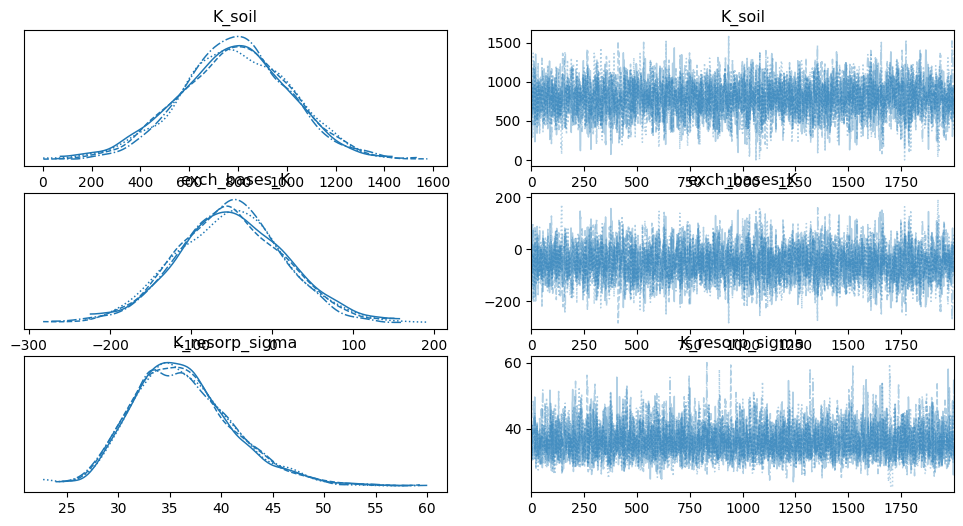

In [ ]:
az.plot_trace(K_idata);

In [ ]:
# Compute the products to multiply each slope with to produce the partial correlations
samples = K_idata.posterior

# the names of the predictors


varnames = ["K_soil","exch_bases_K"]
# compute the needed statistics like R-squared when each predictor is response and all the
# other predictors are the predictor

# x_matrix = common effects design matrix (excluding intercept/constant term)
terms = [t for t in K_model.response_component.common_terms.values() if t.name != "Intercept"]
x_matrix = [pd.DataFrame(x.data, columns=x.levels) for x in terms]
x_matrix = pd.concat(x_matrix, axis=1)
x_matrix.columns = varnames

dm_statistics = {
    'r2_x': pd.Series(
        {
            x: sm.OLS(
                endog=x_matrix[x],
                exog=sm.add_constant(x_matrix.drop(x, axis=1))
                if "Intercept" in K_model.response_component.terms
                else x_matrix.drop(x, axis=1),
            )
            .fit()
            .rsquared
            for x in list(x_matrix.columns)
        }
    ),
    'sigma_x': x_matrix.std(),
    'mean_x': x_matrix.mean(axis=0),
}

r2_x = dm_statistics['r2_x']
sd_x = dm_statistics['sigma_x']
r2_y = pd.Series([sm.OLS(endog=resorp_soil['K_resorp'],
                         exog=sm.add_constant(resorp_soil[[p for p in varnames if p != x]])).fit().rsquared
                  for x in varnames], index=varnames)
sd_y = resorp_soil['K_resorp'].std()

slope_constant = (sd_x[varnames] / sd_y) * ((1 - r2_x[varnames]) / (1 - r2_y)) ** 0.5
pcorr_samples = samples[varnames] * slope_constant

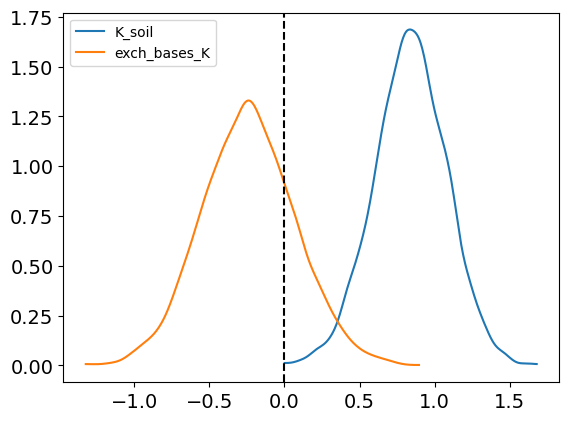

In [ ]:
# Pass the same axes to az.plot_kde to have all the densities in the same plot
_, ax = plt.subplots()
for idx, (k, v) in enumerate(pcorr_samples.items()):
    az.plot_dist(v, label=k, plot_kwargs={'color':f'C{idx}'}, ax=ax)
ax.axvline(x=0, color='k', linestyle='--');


In [ ]:
resorp_soil.to_csv("04_data/3_analysed/resorpt_soil.csv", index=False)

In [ ]:
resorp_soil=pd.read_csv("04_data/3_analysed/resorpt_soil.csv")
resorp_soil.head()

,plotID,CN_soil,NP_soil,P_avail,P_g_kg,CP_soil,CEC,bases_in_CEC,ECEC,bases_in_ECEC,...,K_soil,Mg_soil,TRB_soil,clay,silt,sand,K_resorp,P_resorp,Mg_resorp,intercept
0,KBPL10,9.068644,2.462586,41.629383,2.121970,22.332316,36.676987,60.952607,22.085407,97.236297,...,0.157863,0.415023,0.999533,48.142433,37.862387,13.729543,62.703580,45.391308,20.371786,1
1,KBPL11,10.521983,1.651541,54.279213,3.723836,17.377485,48.740317,10.051393,13.564130,57.645343,...,0.158810,0.473423,0.972210,25.154927,58.444510,18.083197,71.368655,64.874511,21.740237,1
2,KBPL12,11.422400,2.253853,35.966137,2.529166,25.744404,43.953367,0.473767,10.872967,32.574653,...,0.102143,0.305857,0.571347,28.836737,55.569603,18.218593,86.094258,50.964346,4.151535,1
3,KBPL6,9.394063,2.260706,20.380027,1.925181,21.237211,33.489923,42.258943,16.193273,72.928197,...,0.133473,0.346460,0.799360,47.369543,35.611007,14.092243,77.279978,60.199699,51.418205,1
4,UPL1,9.710759,9.285421,29.546290,0.324419,90.168481,18.208220,84.285507,18.361410,93.052103,...,0.118700,0.231177,0.647517,44.268613,51.323850,6.838393,83.970588,76.513001,30.229807,1


In [ ]:
import statsmodels.api as sm
#resorp_soil["intercept"]=1
K_lm=sm.OLS(np.log(resorp_soil['K_resorp']), np.log(resorp_soil[["exch_bases_K","K_soil"]]))
K_results=K_lm.fit()
print(K_results.summary())

                                 OLS Regression Results                                
Dep. Variable:               K_resorp   R-squared (uncentered):                   0.976
Model:                            OLS   Adj. R-squared (uncentered):              0.974
Method:                 Least Squares   F-statistic:                              498.9
Date:                Thu, 19 Oct 2023   Prob (F-statistic):                    7.12e-21
Time:                        20:32:52   Log-Likelihood:                         -27.834
No. Observations:                  27   AIC:                                      59.67
Df Residuals:                      25   BIC:                                      62.26
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

In [ ]:
import statsmodels.api as sm
#resorp_soil["intercept"]=1
P_lm=sm.OLS(np.sqrt(resorp_soil['P_resorp']), np.sqrt(resorp_soil[["P_avail","P_g_kg"]]))
P_results=P_lm.fit()
print(P_results.summary())

                                 OLS Regression Results                                
Dep. Variable:               P_resorp   R-squared (uncentered):                   0.880
Model:                            OLS   Adj. R-squared (uncentered):              0.870
Method:                 Least Squares   F-statistic:                              91.71
Date:                Thu, 19 Oct 2023   Prob (F-statistic):                    3.07e-12
Time:                        20:20:26   Log-Likelihood:                         -67.374
No. Observations:                  27   AIC:                                      138.7
Df Residuals:                      25   BIC:                                      141.3
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [ ]:
resorp_soil["K_res_pred"]=K_results.fittedvalues

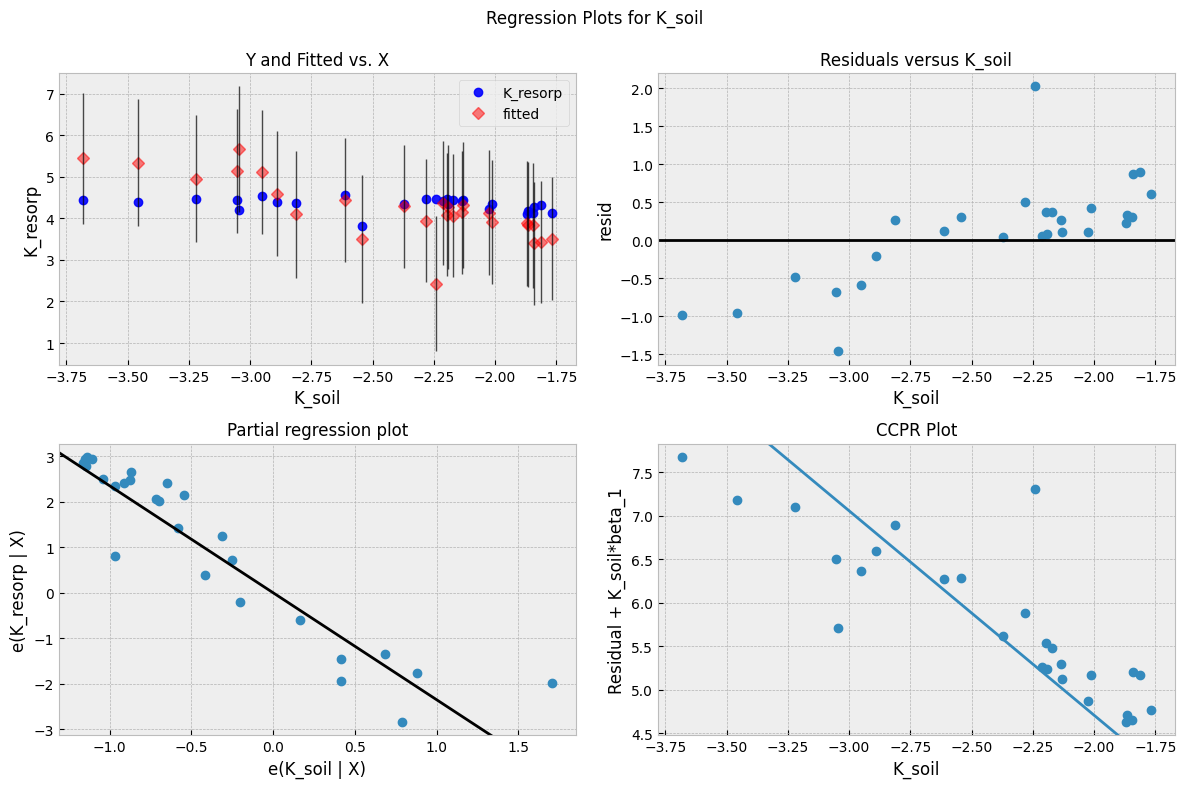

In [ ]:
import statsmodels.api as sm
import statsmodels.graphics.regressionplots as smgraphics

smgraphics.plot_regress_exog(K_results, 'K_soil', fig=plt.figure(figsize=(12, 8)))
plt.show()


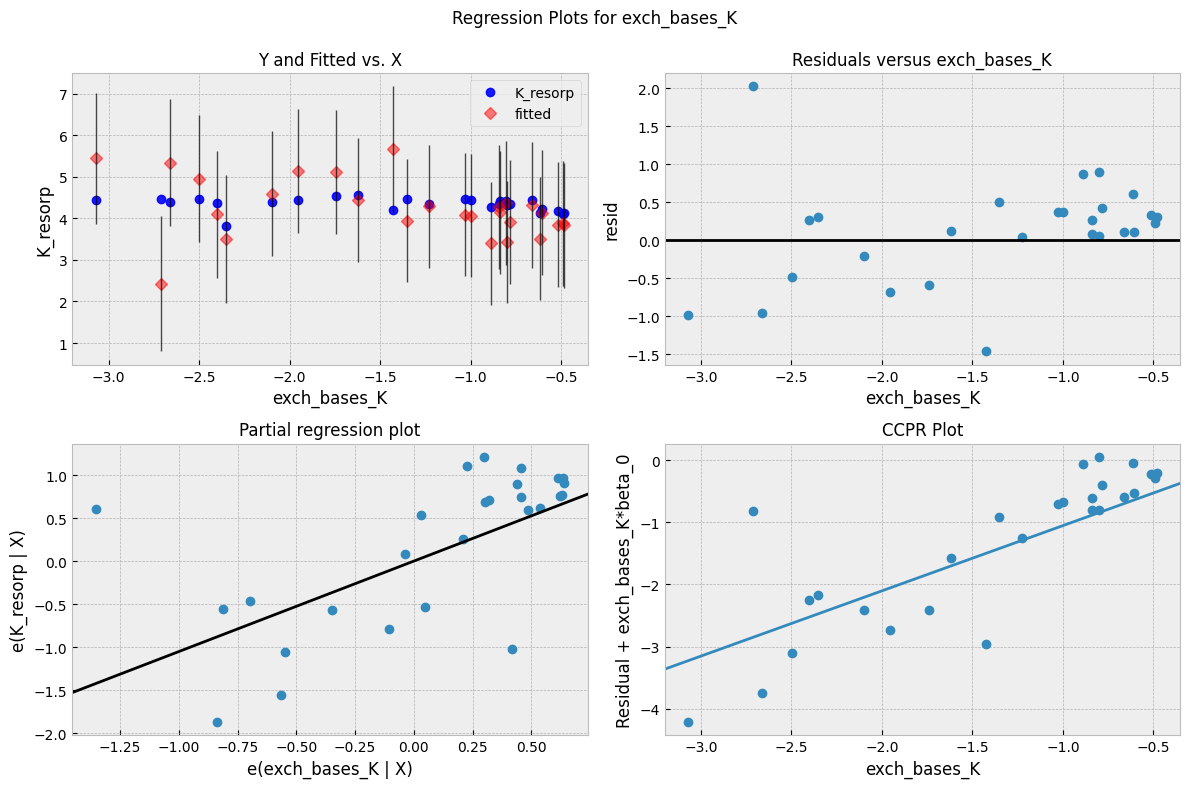

In [ ]:
import statsmodels.api as sm
import statsmodels.graphics.regressionplots as smgraphics

smgraphics.plot_regress_exog(K_results, 'exch_bases_K', fig=plt.figure(figsize=(12, 8)))
plt.show()


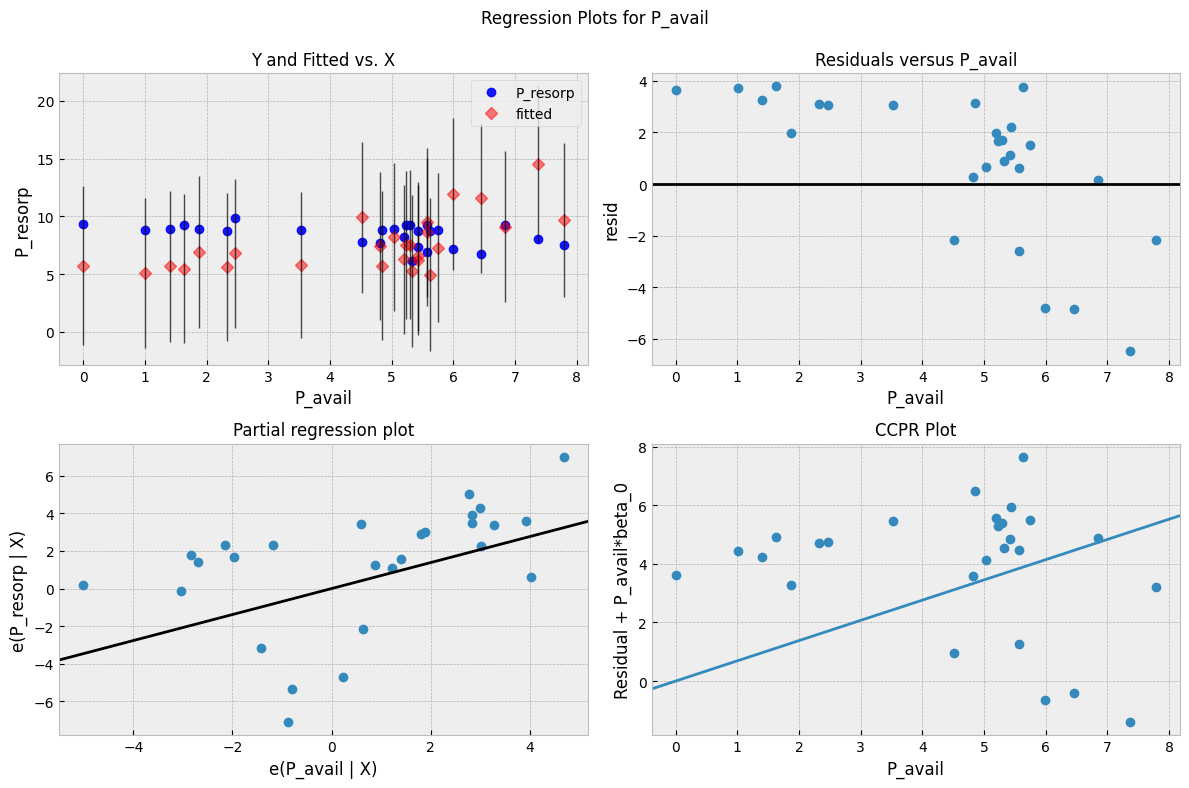

In [ ]:
import statsmodels.api as sm
import statsmodels.graphics.regressionplots as smgraphics

smgraphics.plot_regress_exog(P_results, 'P_avail', fig=plt.figure(figsize=(12, 8)))
plt.show()

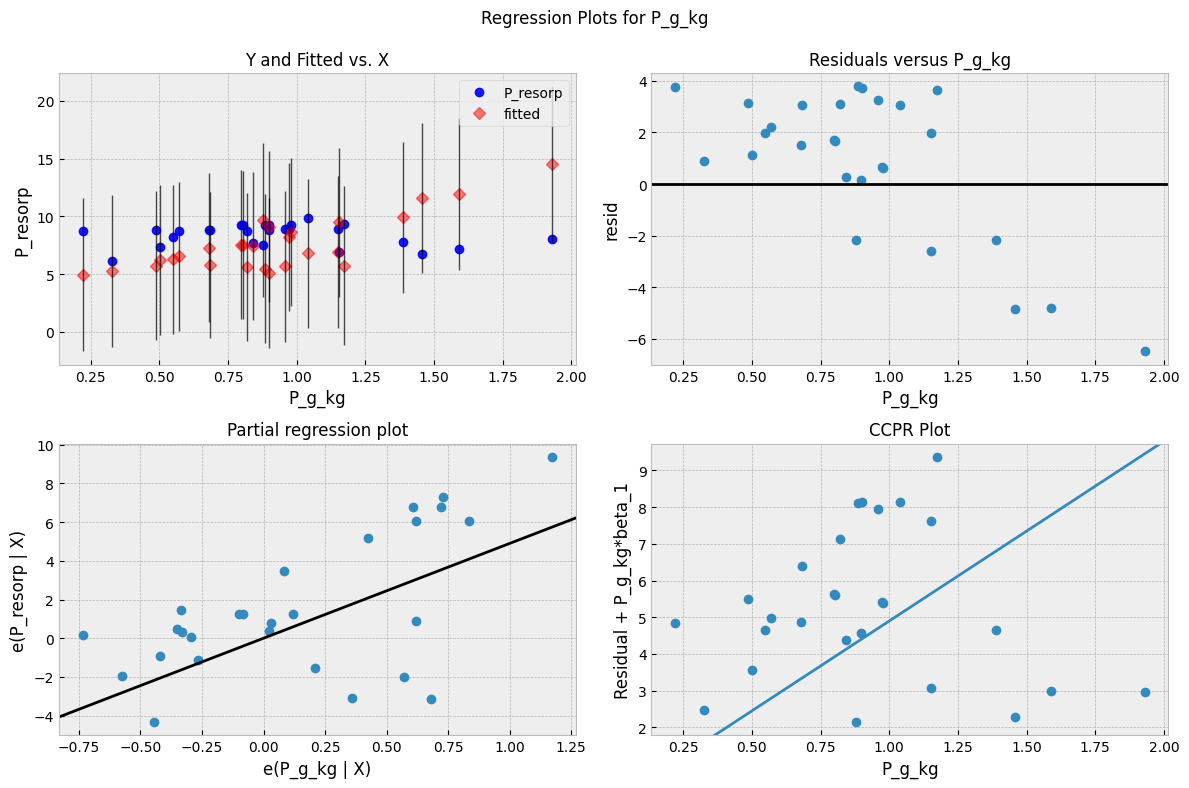

In [ ]:
import statsmodels.api as sm
import statsmodels.graphics.regressionplots as smgraphics

smgraphics.plot_regress_exog(P_results, 'P_g_kg', fig=plt.figure(figsize=(12, 8)))
plt.show()

In [ ]:
# @title
import numpy as np
import pandas as pd
import pymc as pm
import theano.tensor as tt

# Simulated data (replace this with your actual data)
np.random.seed(0)
data = pd.DataFrame({
    'Group': np.repeat(['A', 'B', 'C'], 30),
    'Value': np.random.randn(90)
})

# Define the ANOVA model
with pm.Model() as anova_model:
    # Priors for the group means
    mu = pm.Normal('mu', mu=0, sd=10, shape=len(data['Group'].unique()))

    # Variance parameter
    sigma = pm.HalfNormal('sigma', sd=10)

    # Model the data likelihood
    obs = pm.Normal('obs', mu=mu[data['Group']], sd=sigma, observed=data['Value'])

    # Perform MCMC sampling
    trace = pm.sample(2000, tune=1000, cores=2)

# Analyze the results
pm.summary(trace)
pm.plot_posterior(trace)

# Perform pairwise comparisons (if needed)
from pymc.stats import compare
comp = compare({anova_model: trace}, ic='WAIC')
print(comp)


In [ ]:
# @title
import pymc4 as pm
import numpy as np

# Generate synthetic data
np.random.seed(42)
num_samples = 100
x1 = np.random.normal(0, 1, num_samples)
x2 = np.random.uniform(-1, 1, num_samples)
x3 = np.random.exponential(2, num_samples)
true_intercept = 1.5
true_coefficients = [0.7, -0.3, 0.5]
true_noise = 0.5
y = true_intercept + np.dot(true_coefficients, np.array([x1, x2, x3])) + np.random.normal(0, true_noise, num_samples)

# Define the PyMC4 model
def regression_model(x1, x2, x3, y):
    # Priors for regression coefficients
    coef1 = yield pm.Normal('coef1', mu=0, sigma=10)
    coef2 = yield pm.Normal('coef2', mu=0, sigma=10)
    coef3 = yield pm.Normal('coef3', mu=0, sigma=10)

    # Prior for intercept
    intercept = yield pm.Normal('intercept', mu=0, sigma=10)

    # Likelihood (Likelihoods based on predictors' distributions)
    mu = intercept + coef1 * x1 + coef2 * x2 + coef3 * x3
    sigma = yield pm.Exponential('sigma', lam=1)
    y_obs = yield pm.Normal('y_obs', mu=mu, sigma=sigma, observed=y)

# Compile the model
compiled_regr_model = pm.Model(regression_model)

# Define the data dictionary
data = {'x1': x1, 'x2': x2, 'x3': x3, 'y': y}

# Sample from the model
with compiled_regr_model:
    trace = pm.sample()

# Print a summary of the results
print(pm.summary(trace))
